# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
df = pd.read_csv('train.csv')
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
from datetime import datetime

df = df.drop(['dropoff_datetime'], axis=1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Text(0.5, 1.0, 'trip_duration distribution')

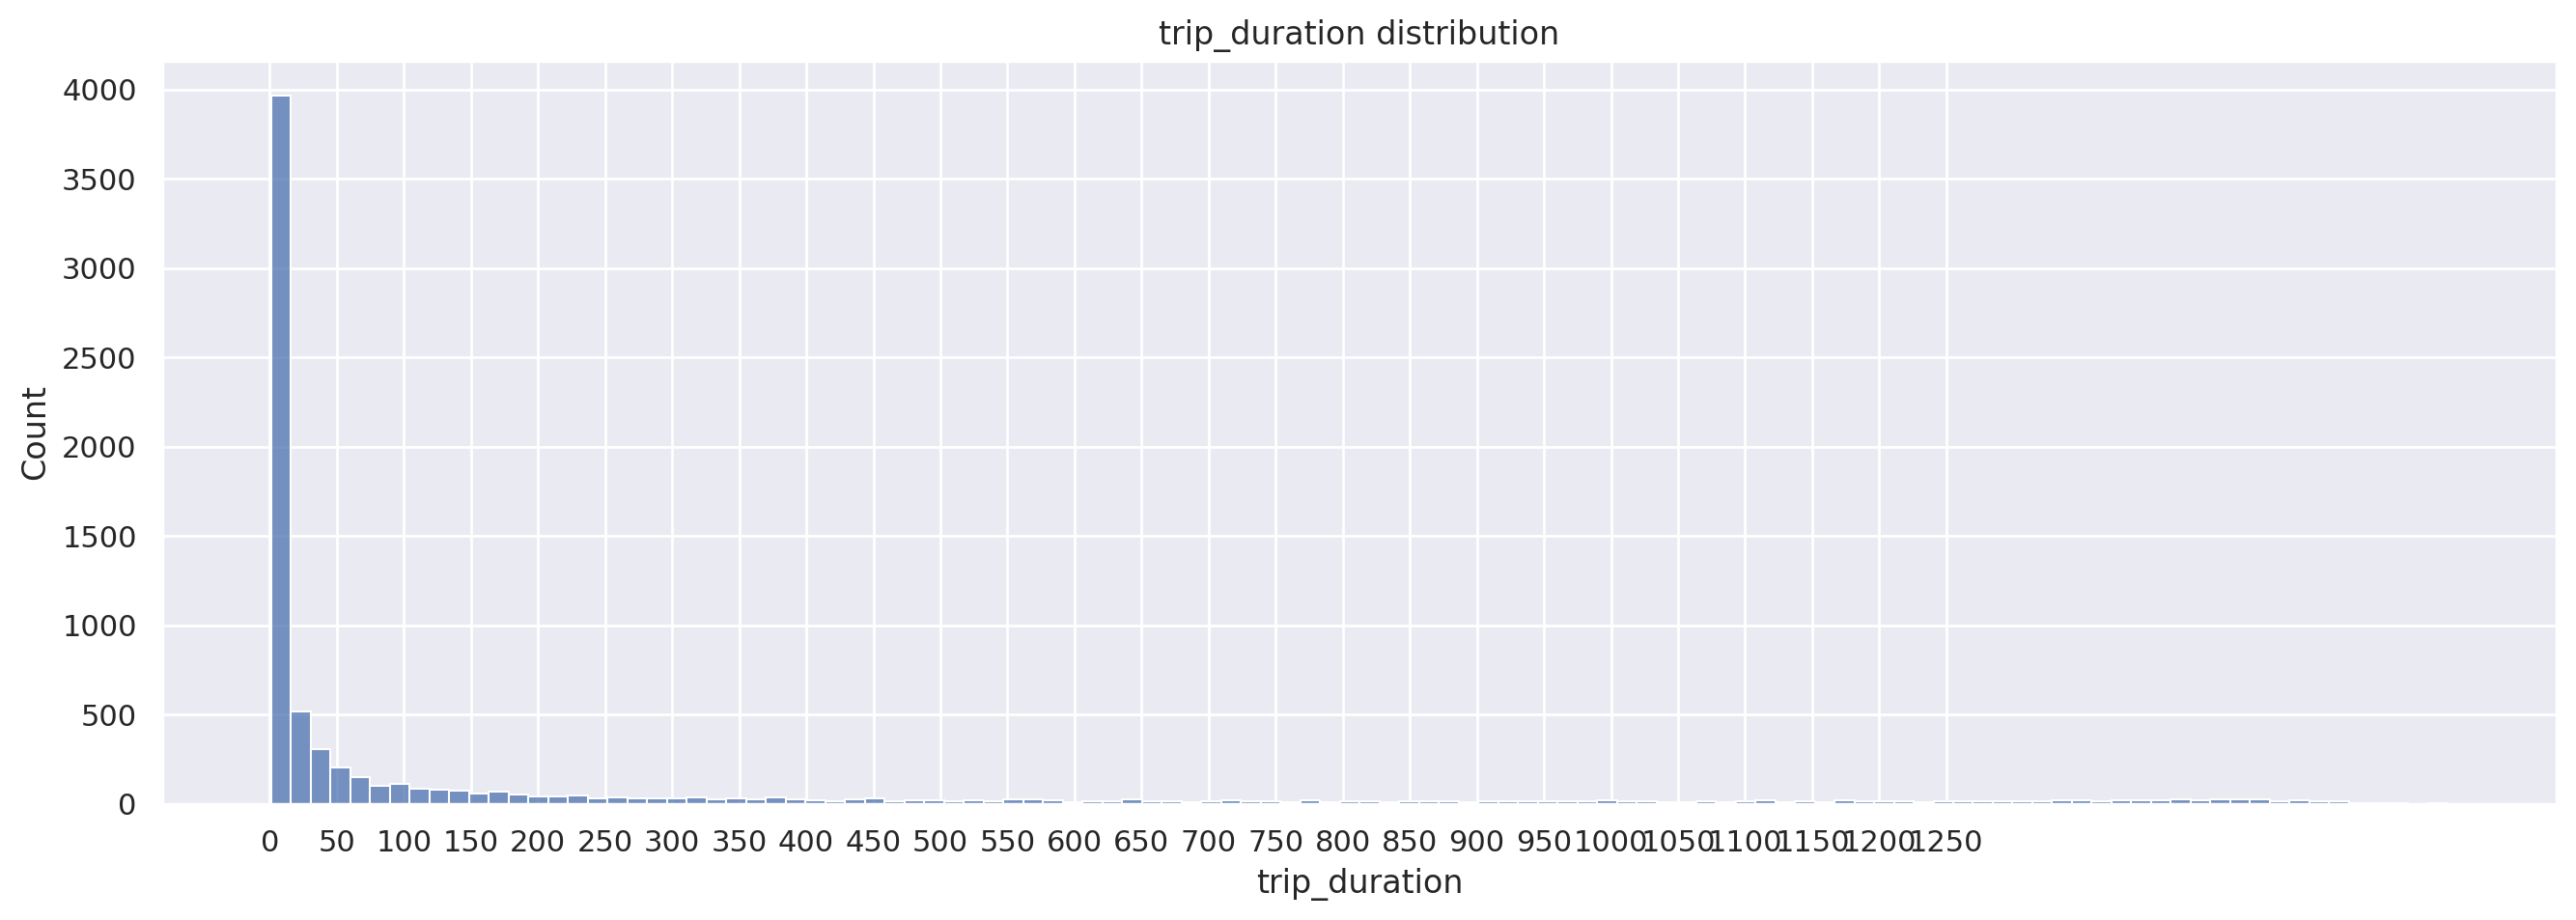

In [ ]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16, 5
plt.rcParams['font.size'] = 8
# mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')
plt.xticks(np.arange(0, 1300, 50))
hist = sns.histplot(df['trip_duration'].value_counts())
hist.set_title('trip_duration distribution')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?


**Ответ**: Абсолютное большинство поездок укладывается в 20-30 минут (а то и меньше)

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: Потому что RMSLE менее чувствителен к выбросам, так как в случае RMSLE ошибки представлены в логарифмическом масштабе.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $a(x_i) = \exp(\hat{a}(x_i)) - 1⇒\log(a(x_i)+1)=\hat{a}(x_i)$

Тогда:

$\hat{Q}_{MSE}=\dfrac{\sum_{i=1}^l(\hat{a}_i-\hat{y}_i)^2}{l}=\dfrac{\sum_{i=1}^l(\log(y_i+1)-\log(a(x_i)+1))^2}{l}$

С другой стороны

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

Но оптимизировать $f(x)$ равносильно оптимизации $\sqrt{f(x)}$ так как корень - монотонная функция. Доказали.






Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df = df.drop(['trip_duration'], axis=1)
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.sum((log1p_y_pred - log1p_y_true) ** 2) / len(log1p_y_true))

rmsle_best_const = rmsle(df['log_trip_duration'], np.mean(df['log_trip_duration']))
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0, 0.5, 'Кол-во поездок')

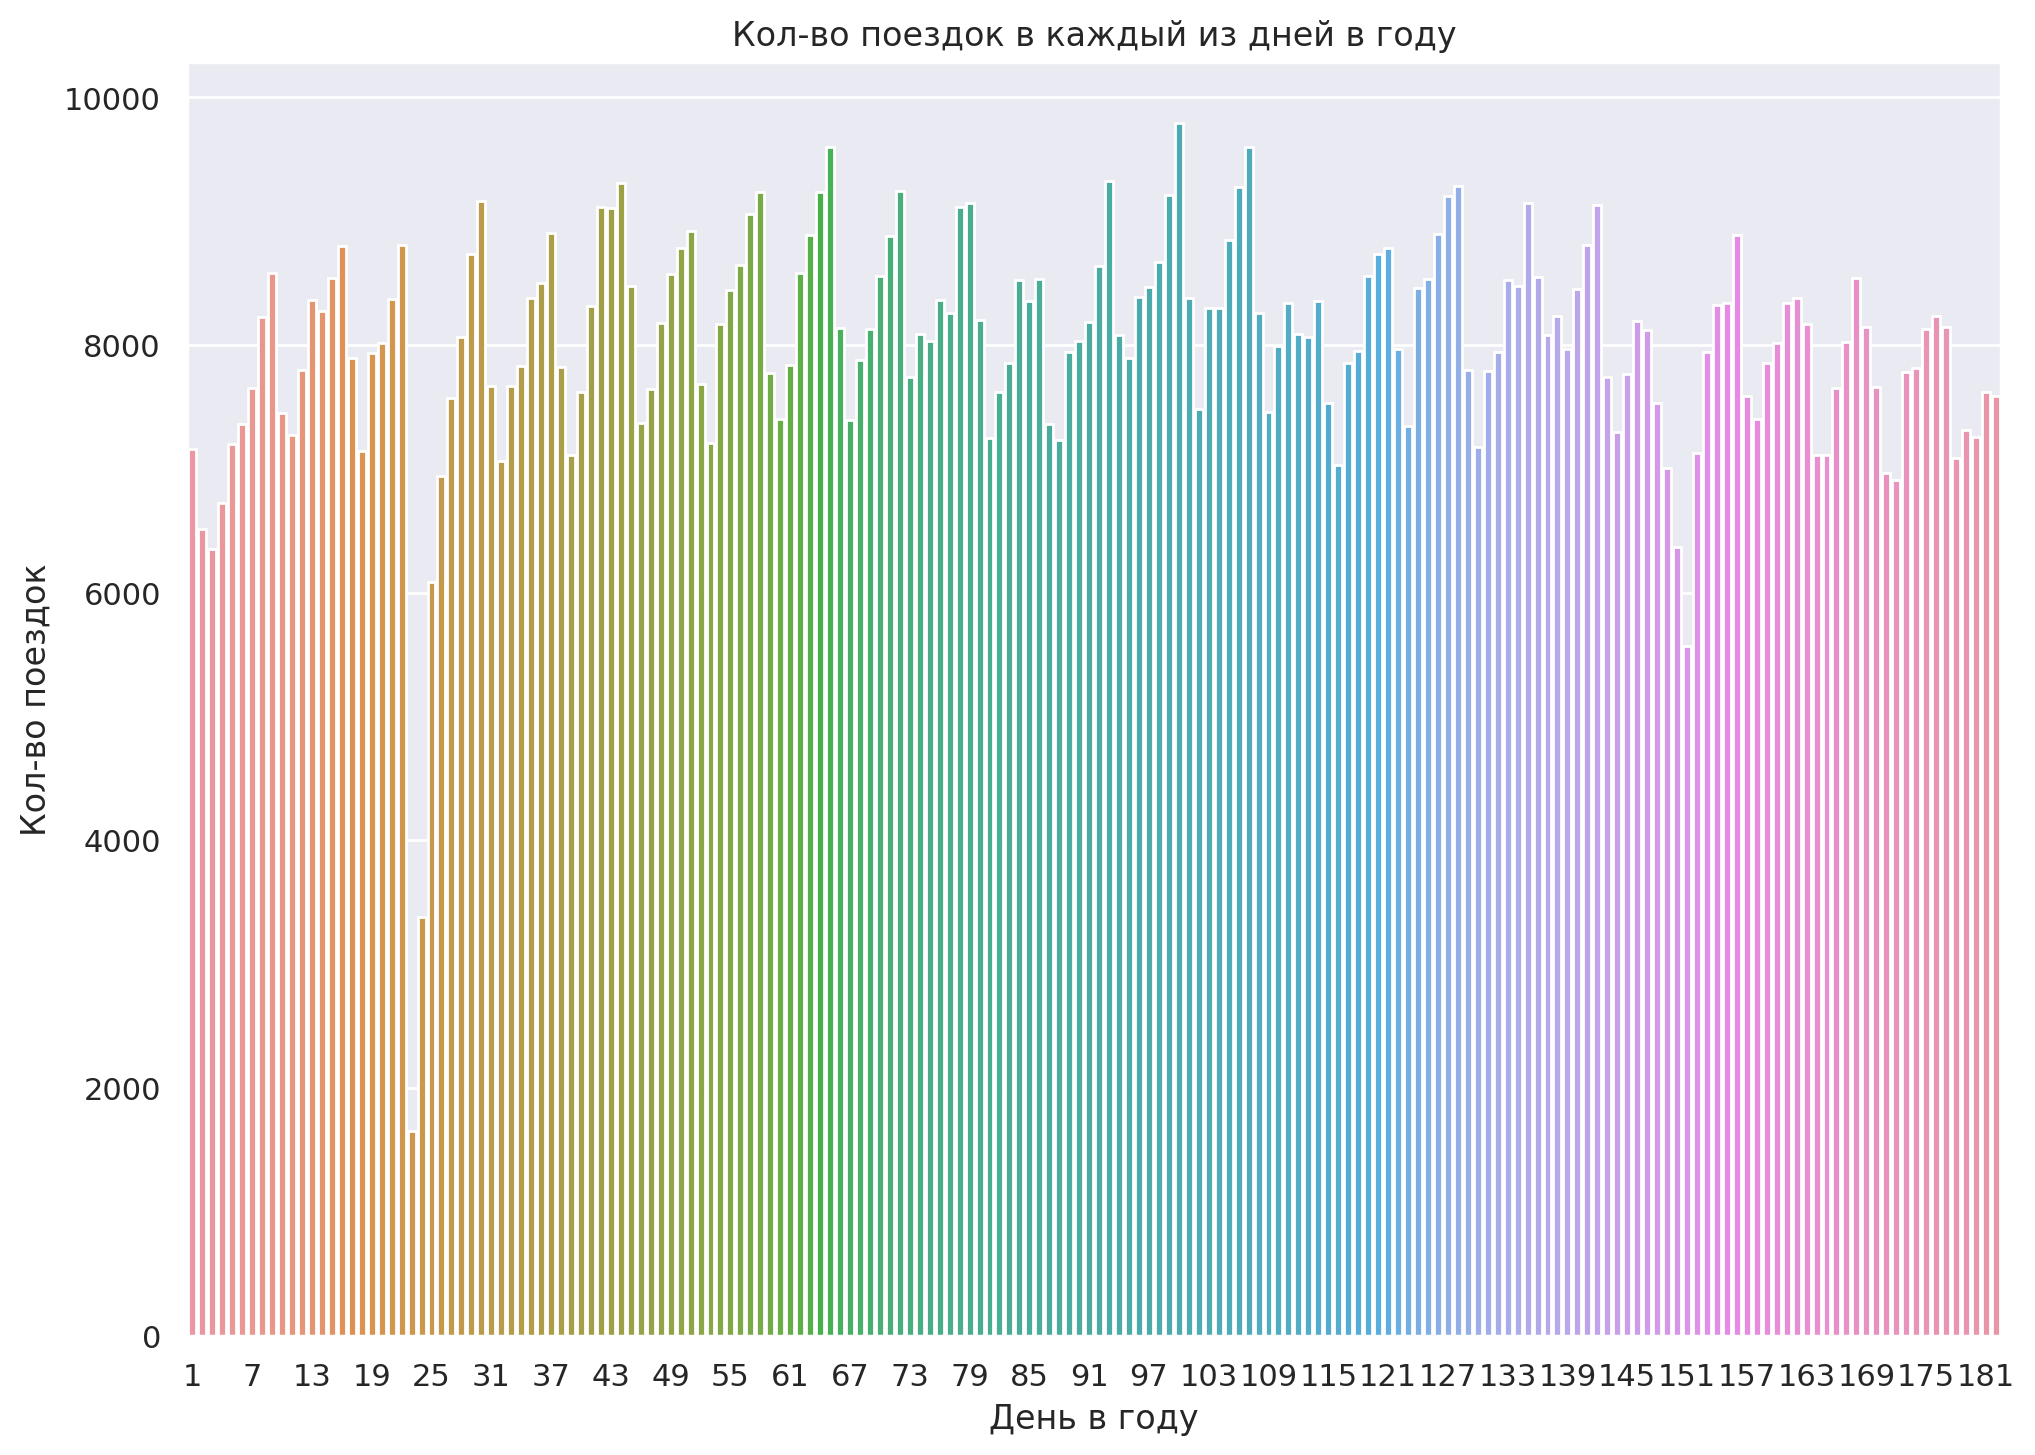

In [ ]:
plt.rcParams['figure.figsize'] = 11.7,8.27
fig = sns.countplot(df, x=df['pickup_datetime'].dt.day_of_year)
fig.set_title('Кол-во поездок в каждый из дней в году')
plt.xticks(np.arange(0, 182, 6))
plt.xlabel('День в году')
plt.ylabel('Кол-во поездок')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
from datetime import timedelta

tmp = df.groupby(by=df['pickup_datetime'].dt.day_of_year).count().copy()
tmp = tmp.loc[tmp['id'] < 6000, :][['id']].reset_index()
print(tmp)
print(datetime(2016, 1, 1) + timedelta(int(tmp.iloc[0]['pickup_datetime']) - 1))
print(datetime(2016, 1, 1) + timedelta(int(tmp.iloc[1]['pickup_datetime']) - 1))
print(datetime(2016, 1, 1) + timedelta(int(tmp.iloc[2]['pickup_datetime']) - 1))
# 2016-01-23 были снегопады: https://en.wikipedia.org/wiki/January_2016_United_States_blizzard

   pickup_datetime    id
0               23  1648
1               24  3383
2              151  5570
2016-01-23 00:00:00
2016-01-24 00:00:00
2016-05-30 00:00:00


Text(-27.180555555555557, 0.5, 'Кол-во поездок')

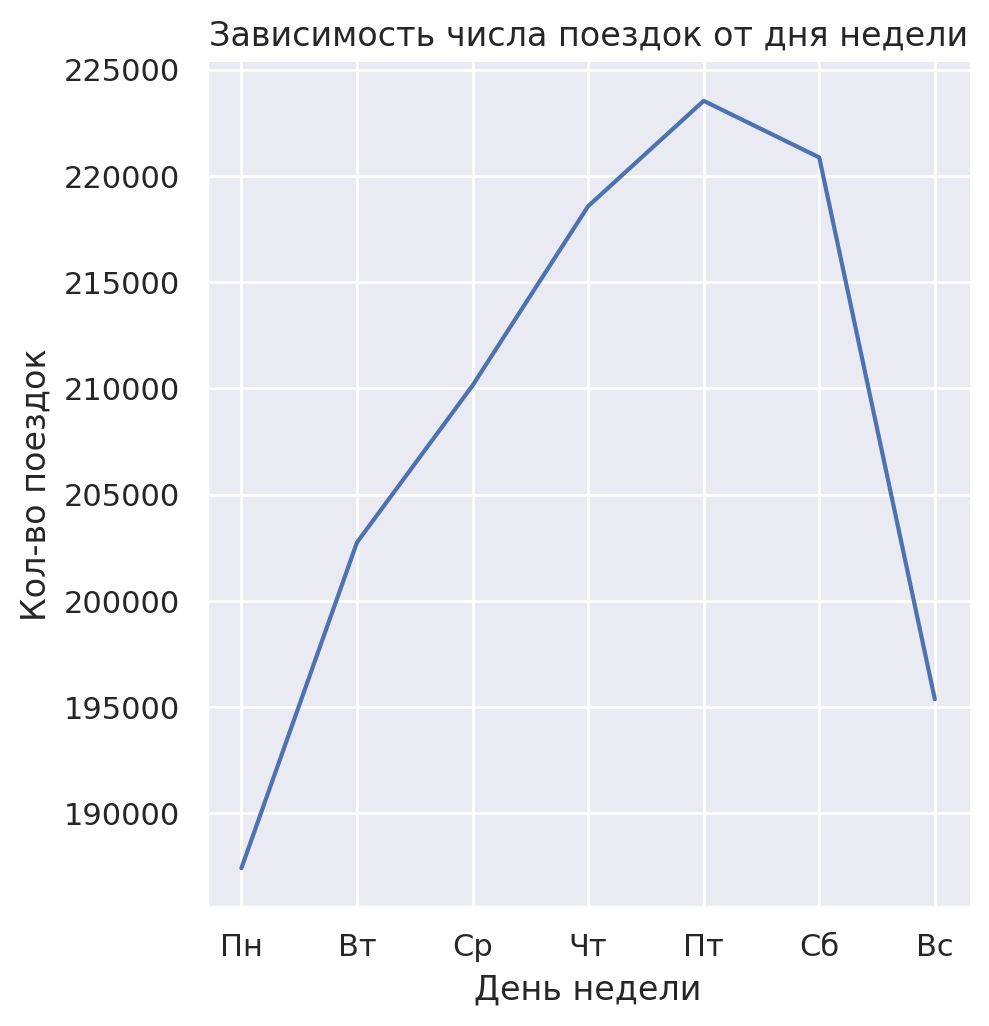

In [ ]:
tmp2 = df.groupby(by=df['pickup_datetime'].dt.day_of_week).count().copy()[['id']]
tmp2 = tmp2.reset_index()
fig = sns.relplot(tmp2, y=tmp2['id'], x=tmp2['pickup_datetime'], kind='line')
plt.rcParams['figure.figsize'] = 16, 5
plt.title('Зависимость числа поездок от дня недели')
plt.xticks(np.arange(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('День недели')
plt.ylabel('Кол-во поездок')

Text(-17.555555555555557, 0.5, 'Кол-во поездок')

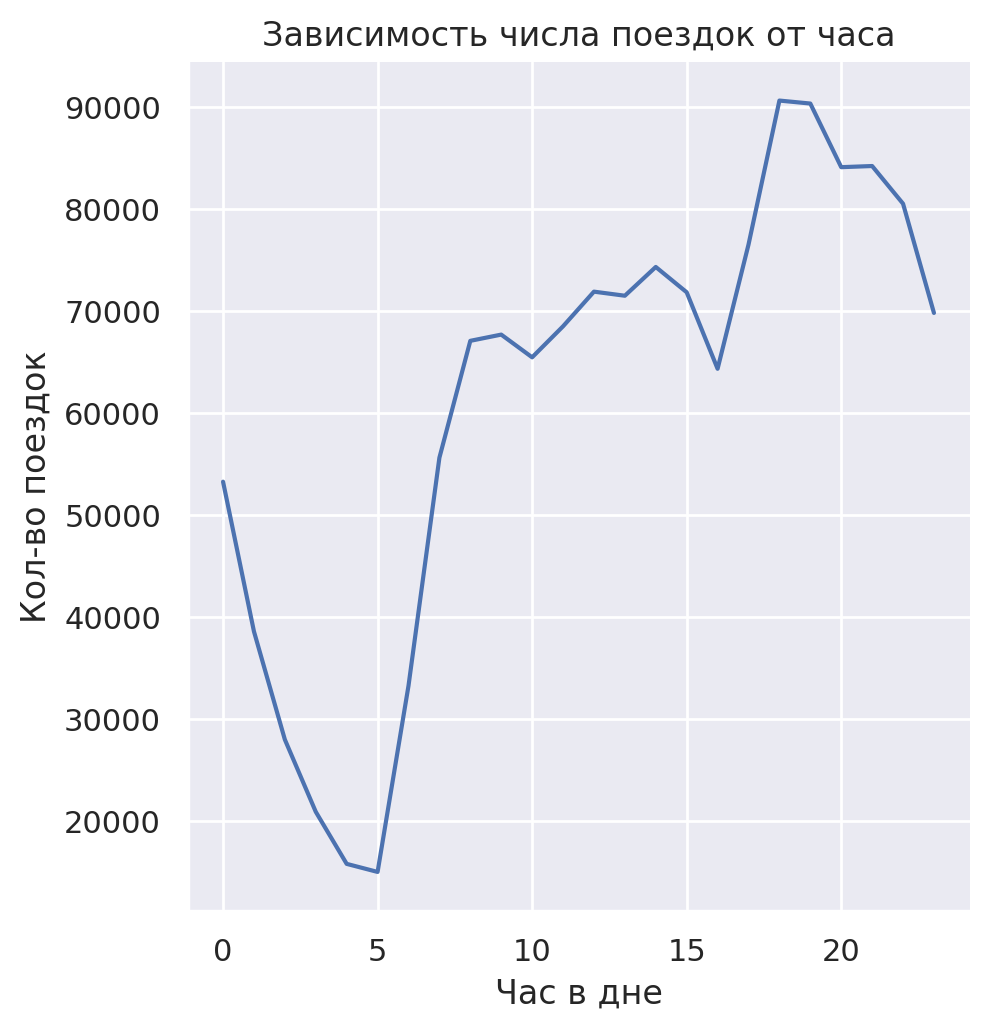

In [ ]:
plt.rcParams['figure.figsize'] = 16, 5
tmp2 = df.groupby(by=df['pickup_datetime'].dt.hour).count().copy()[['id']]
tmp2 = tmp2.reset_index()
fig = sns.relplot(tmp2, y=tmp2['id'], x=tmp2['pickup_datetime'], kind='line')
plt.title('Зависимость числа поездок от часа')
plt.xlabel('Час в дне')
plt.ylabel('Кол-во поездок')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(42.822861111111095, 0.5, 'Кол-во поездок')

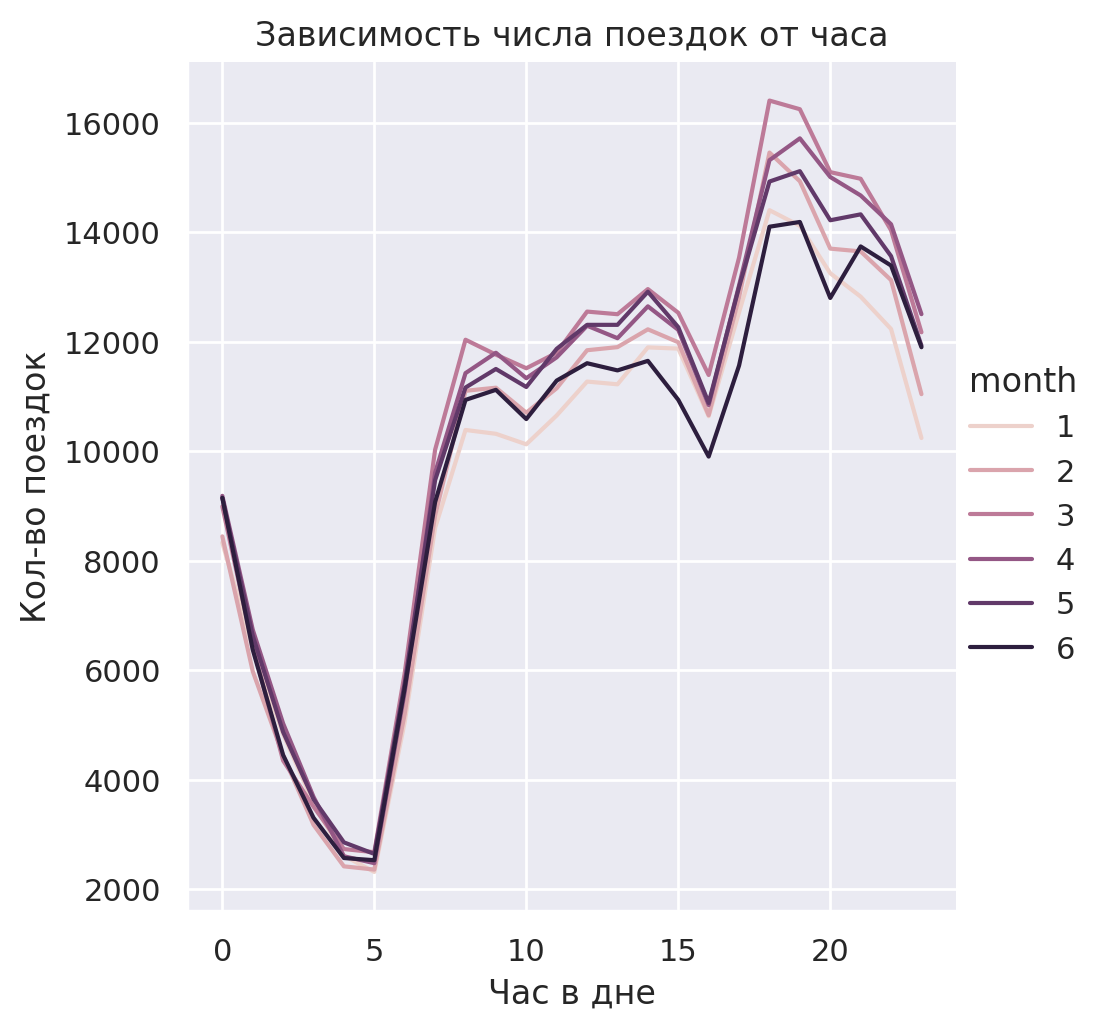

In [ ]:
plt.rcParams['figure.figsize'] = 16, 5
tmp3 = df.copy()
tmp3['month'] = tmp3['pickup_datetime'].dt.month
tmp3['hour'] = tmp3['pickup_datetime'].dt.hour
tmp3 = tmp3.groupby(['month', 'hour']).count().reset_index()
tmp3 = tmp3[['id', 'month', 'hour']]
fig = sns.relplot(tmp3, y='id', x='hour', kind='line', hue='month')
plt.title('Зависимость числа поездок от часа')
plt.xlabel('Час в дне')
plt.ylabel('Кол-во поездок')

Text(42.54531250000001, 0.5, 'Кол-во поездок')

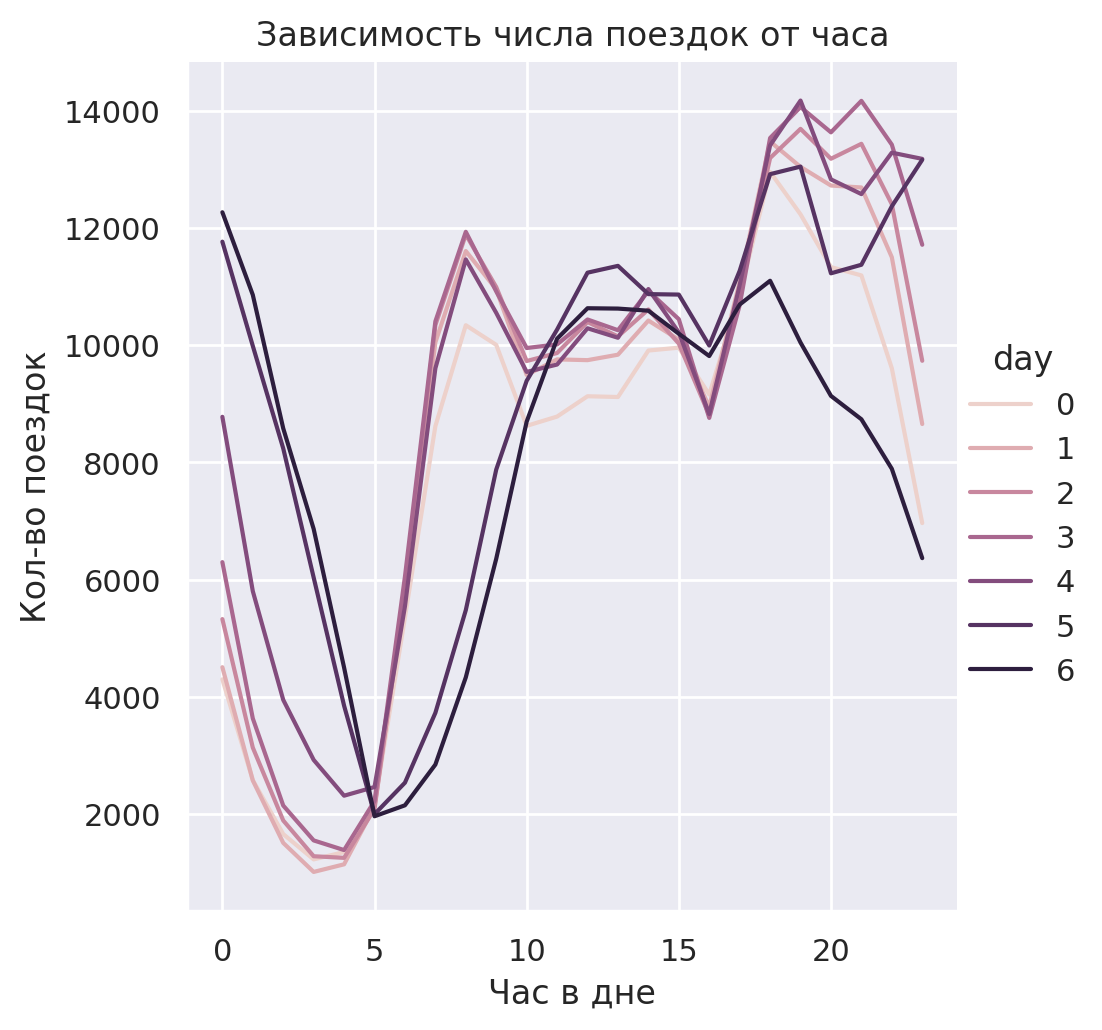

In [ ]:
plt.rcParams['figure.figsize'] = 16, 5
tmp4 = df.copy()
tmp4['day'] = tmp4['pickup_datetime'].dt.day_of_week
tmp4['hour'] = tmp4['pickup_datetime'].dt.hour
tmp4 = tmp4.groupby(['day', 'hour']).count().reset_index()
tmp4 = tmp4[['id', 'day', 'hour']]
fig = sns.relplot(tmp4, y='id', x='hour', kind='line', hue='day')
plt.title('Зависимость числа поездок от часа')
plt.xlabel('Час в дне')
plt.ylabel('Кол-во поездок')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Как можно видеть, в пятницу у нас наибольший спрос, видимо, из-за желания у людей хорошо отдохнуть и сходить в бар. В субботу спрос тоже довольно большой, видимо много людей сидит там (в баре) до утра.

Если рассмотреть почасовой график, то можно увидеть резкий скачок с 5 утра до ~9 утра (народ едет на завод), потом график немного колеблется и растет еще больше, в результате чего достигает пика в примерно 6-7 вечера (народ едет домой).

По третьему графику видно, что такая тенденция по часам одинакова для всех 6 месяцев. Больше всего такси вызывают в марте, мб это связано с тем, что всё тает и на дорогах грязно, люди не хотят потом отмывать свои машины и берут такси.

По четвертому графику видно, что меньше людей вызывает такси с утра в дни 5 и 6 (это суббота и воскресенье). Но в те же дни в ночные часы спрос больше, чем в остальные дни (гуляем). Также вечерний пик более выражен у дней с 0 по 4 включительно, т.к. это рабочие дни недели.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=1337)

<ipython-input-103-7aba655d2e8e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tr_tmp = train.groupby(by=train['pickup_datetime'].dt.day_of_week).mean().copy()[['log_trip_duration']]


Text(-3.3055555555555554, 0.5, 'Средний логарифм')

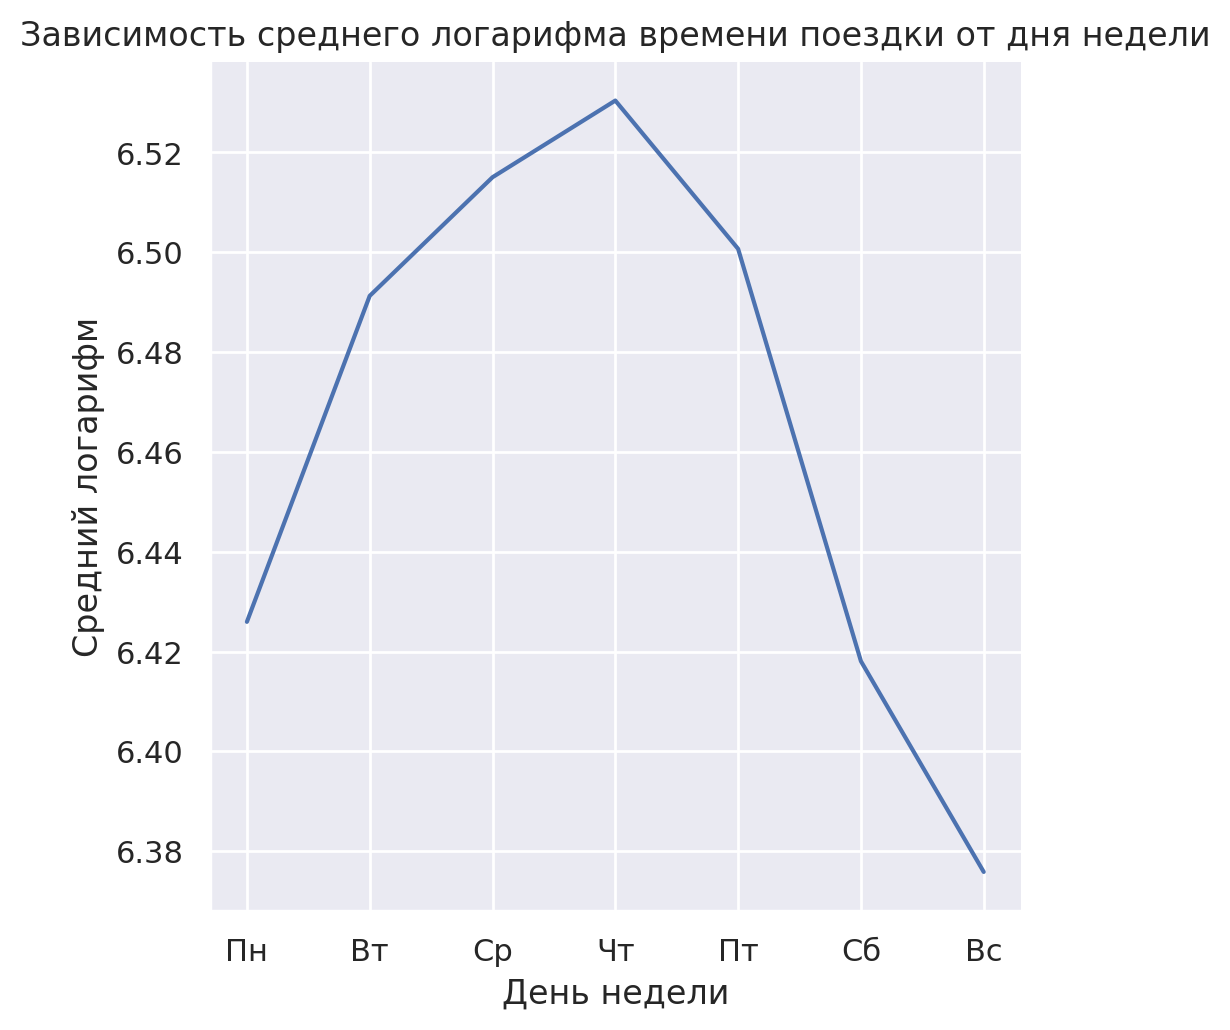

In [ ]:
tr_tmp = train.groupby(by=train['pickup_datetime'].dt.day_of_week).mean().copy()[['log_trip_duration']]
tr_tmp = tr_tmp.reset_index()
fig = sns.relplot(tr_tmp, y=tr_tmp['log_trip_duration'], x=tr_tmp['pickup_datetime'], kind='line')
plt.rcParams['figure.figsize'] = 16, 5
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.xticks(np.arange(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('День недели')
plt.ylabel('Средний логарифм')

<ipython-input-104-895d4e713d47>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tr_tmp2 = train.groupby(by=train['pickup_datetime'].dt.hour).mean().copy()[['log_trip_duration']]


Text(-3.3055555555555554, 0.5, 'Средний логарифм')

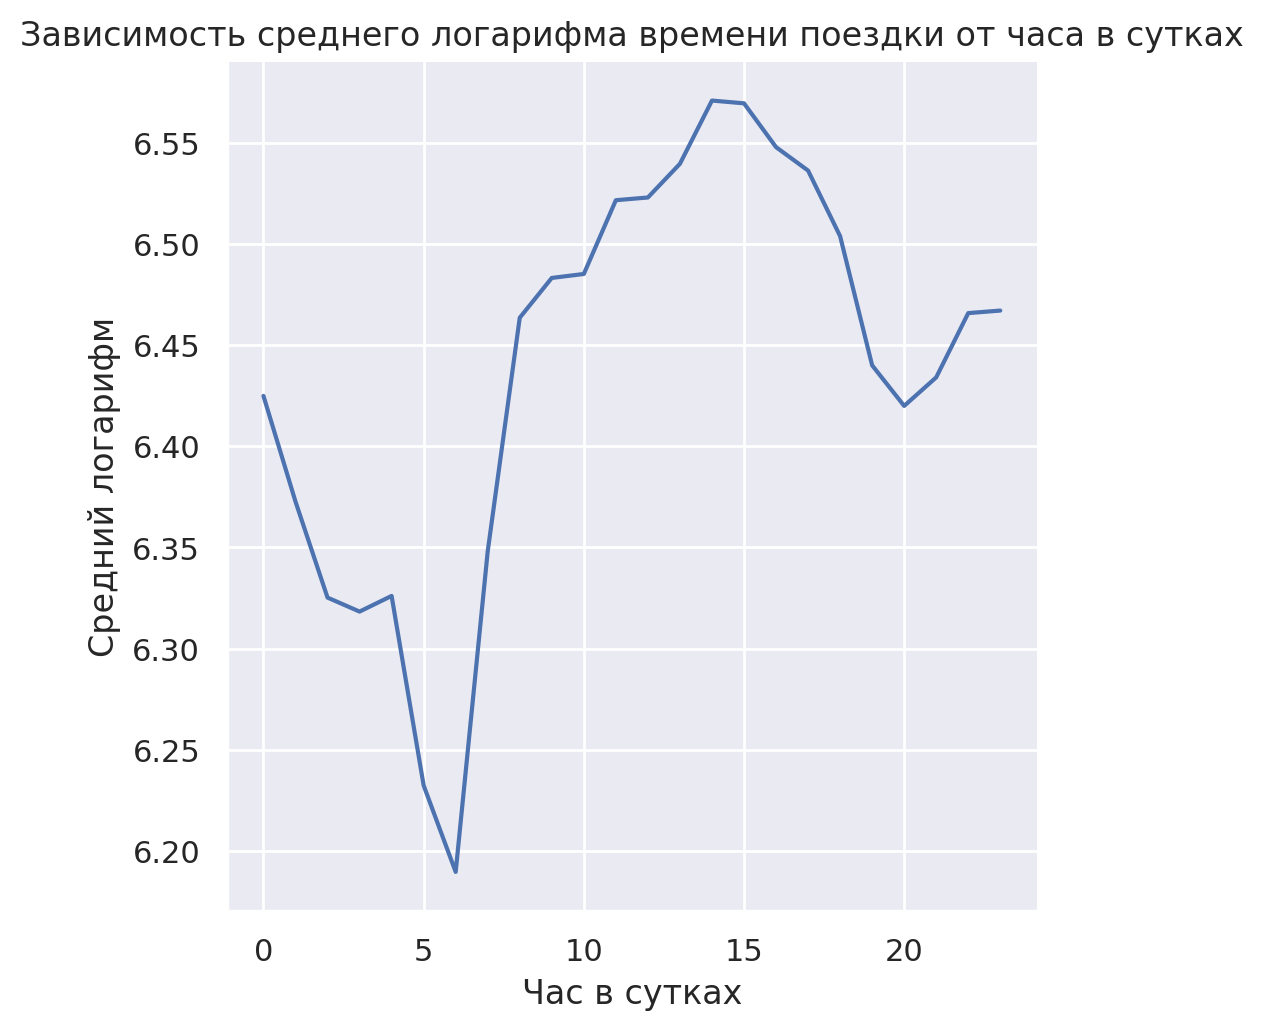

In [ ]:
tr_tmp2 = train.groupby(by=train['pickup_datetime'].dt.hour).mean().copy()[['log_trip_duration']]
tr_tmp2 = tr_tmp2.reset_index()
fig = sns.relplot(tr_tmp2, y=tr_tmp2['log_trip_duration'], x=tr_tmp2['pickup_datetime'], kind='line')
plt.rcParams['figure.figsize'] = 16, 5
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.xlabel('Час в сутках')
plt.ylabel('Средний логарифм')

<ipython-input-105-cb6e5c41c64a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tr_tmp3 = train.groupby(by=train['pickup_datetime'].dt.day_of_year).mean().copy()[['log_trip_duration']]


Text(6.319444444444445, 0.5, 'Средний логарифм')

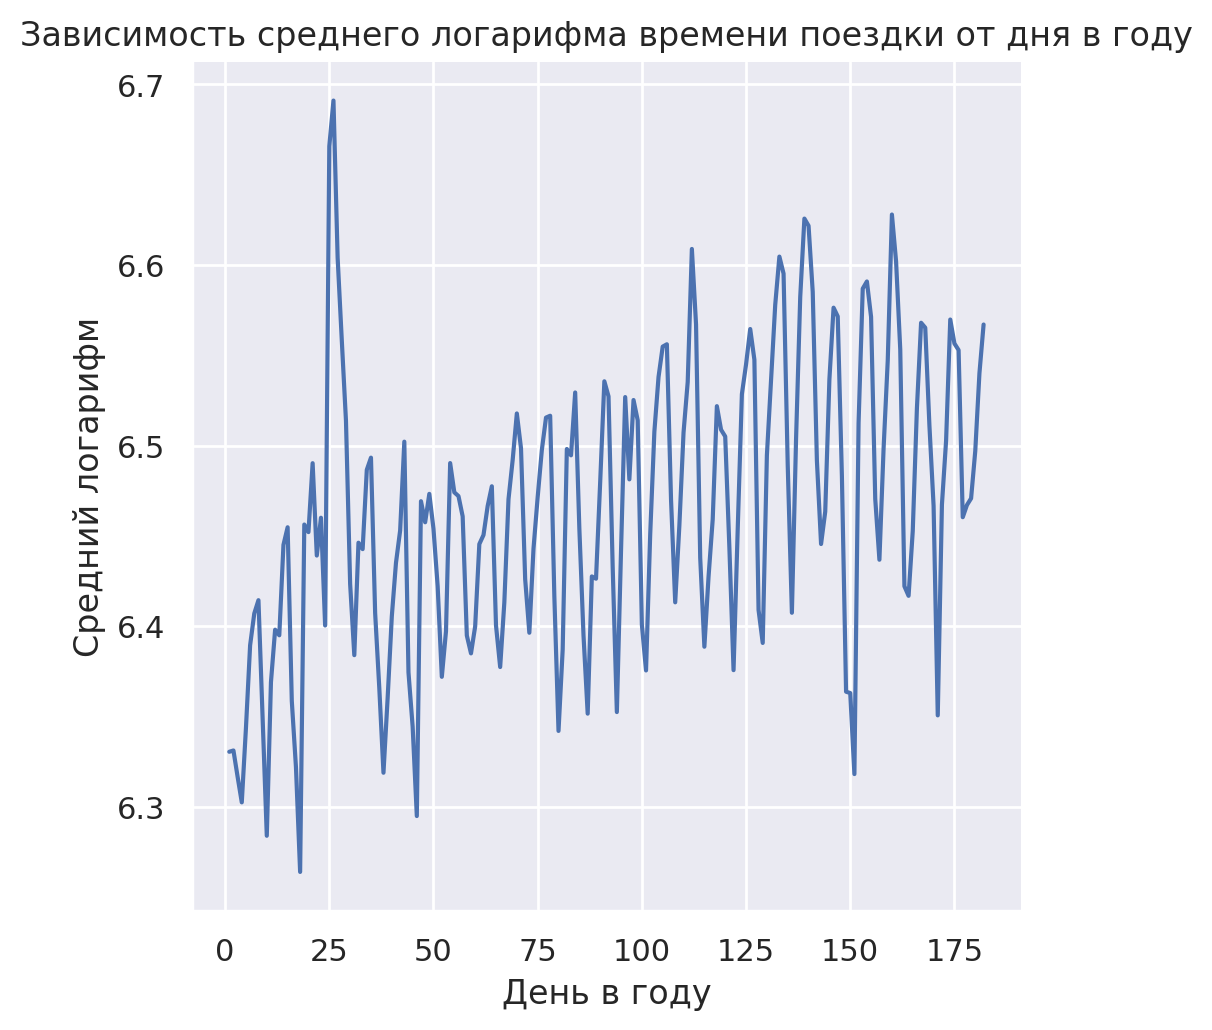

In [ ]:
tr_tmp3 = train.groupby(by=train['pickup_datetime'].dt.day_of_year).mean().copy()[['log_trip_duration']]
tr_tmp3 = tr_tmp3.reset_index()
fig = sns.relplot(tr_tmp3, y=tr_tmp3['log_trip_duration'], x=tr_tmp3['pickup_datetime'], kind='line')
plt.rcParams['figure.figsize'] = 16, 5
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ:** Графики зависимости таргета от дня недели и от часа в сутках очень похожи на аналогичные графики для количества поездок. В целом это логично, так как повышенный спрос должен положительно влиять на наш таргет.

Таргет очень низкий в те два периода (дни 23 и 151). Видимо, так происходит, потому что таргет линейно (со знаком плюс, конечно же) зависит от спроса (кол-ва поездок).

График зависимости log_trip_duration от номера дня в году изрядно колбасит каждые 6-7 дней: спрос на такси падает на выходных

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
train['day_of_week'] = train['pickup_datetime'].dt.day_of_week
train['month'] = train['pickup_datetime'].dt.month
train['hour'] = train['pickup_datetime'].dt.hour
train['day_of_year'] = train['pickup_datetime'].dt.day_of_year
train['anomal'] = 0
train.loc[train['day_of_year'].isin({23, 24, 151}), 'anomal'] = 1

test['day_of_week'] = test['pickup_datetime'].dt.day_of_week
test['month'] = test['pickup_datetime'].dt.month
test['hour'] = test['pickup_datetime'].dt.hour
test['day_of_year'] = test['pickup_datetime'].dt.day_of_year
test['anomal'] = 0
test.loc[test['day_of_year'].isin({23, 24, 151}), 'anomal'] = 1

In [ ]:
train.sample(5)

id  vendor_id     pickup_datetime  passenger_count  \
452659  id1972389          1 2016-03-14 08:31:26                1   
573614  id3431982          1 2016-02-12 23:09:28                1   
430815  id2957894          1 2016-04-01 15:11:42                1   
603929  id1606653          2 2016-04-07 12:20:45                5   
330851  id0423974          1 2016-06-16 12:01:51                2   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
452659        -73.993256        40.747540         -73.995247   
573614        -73.989197        40.763729         -73.975594   
430815        -73.993431        40.751976         -74.001076   
603929        -73.874611        40.774132         -73.950684   
330851        -73.995132        40.726902         -74.008911   

        dropoff_latitude store_and_fwd_flag  log_trip_duration  day_of_week  \
452659         40.760265                  N           6.614726            0   
573614         40.780361                  N           6.280396            4   
430815         40.755497                  N           5.955837            4   
603929         40.707615                  N           7.156177            3   
330851         40.721569                  N           6.561031            3   

        month  hour  day_of_year  anomal  
452659      3     8           74       0  
573614      2    23           43       0  
430815      4    15           92       0  
603929      4    12           98       0  
330851      6    12          168       0

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Как категориальные: `vendor_id`, `store_and_fwd_flag`, `day_of_week`, `month`, `hour`, `day_of_year`, `anomal`. Их надо рассмотреть именно так, потому что на множестве значений этих столбцов отсутствует отношение порядка. Как численные: `passenger_count`, `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`. На них есть отношение порядка. `log_trip_duration` - не признак, а таргет, так что его не рассматриваем.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train.drop(['log_trip_duration'], axis=1)
y_train = train.loc[:, 'log_trip_duration']
X_test = test.drop(['log_trip_duration'], axis=1)
y_test = test.loc[:, 'log_trip_duration']

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'anomal']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7742764699544301
constant rmsle:  0.7957592365411509


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
m = show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")
m

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

От основной массы выделяется группа точек в аэропорте Джона Кеннеди. Там довольно много точек (плюс минус 8), но при этом на близлежащей территории точек крайне мало. Это единственное место в черте города, которое довольно популярно (абсолютное большинство поездок заканчивается и начинается прямо в самом центре Нью-Йорка).

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine
# взято с https://stackoverflow.com/questions/25767596/vectorised-haversine-formula-with-a-pandas-dataframe
train['haversine'] = train.apply(lambda row: haversine((row["pickup_latitude"], row["pickup_longitude"]),
                                                      (row["dropoff_latitude"], row["dropoff_longitude"])), axis=1)
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1397246  id1594548          1 2016-06-13 22:15:23                1   
1308206  id0707935          2 2016-06-02 02:12:10                6   
535789   id1025614          2 2016-02-17 14:21:19                1   
798332   id0047761          2 2016-02-29 21:08:06                1   
1313015  id3060811          2 2016-06-16 06:53:50                2   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1397246        -73.984726        40.737175         -74.000862   
1308206        -73.998650        40.717270         -73.868622   
535789         -73.982048        40.740261         -73.980057   
798332         -73.994102        40.759190         -73.977432   
1313015        -74.012299        40.701466         -73.990669   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  day_of_week  \
1397246         40.741886                  N           5.993961            0   
1308206         40.747570                  N           7.932003            3   
535789          40.751900                  N           6.489205            2   
798332          40.782902                  N           6.298949            0   
1313015         40.693214                  N           6.006353            3   

         month  hour  day_of_year  anomal  haversine  
1397246      6    22          165       0   1.456923  
1308206      6     2          154       0  11.462460  
535789       2    14           48       0   1.304986  
798332       2    21           60       0   2.987097  
1313015      6     6          168       0   2.041258

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
train['log_haversine'] = np.log1p(train['haversine'])
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1397246  id1594548          1 2016-06-13 22:15:23                1   
1308206  id0707935          2 2016-06-02 02:12:10                6   
535789   id1025614          2 2016-02-17 14:21:19                1   
798332   id0047761          2 2016-02-29 21:08:06                1   
1313015  id3060811          2 2016-06-16 06:53:50                2   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1397246        -73.984726        40.737175         -74.000862   
1308206        -73.998650        40.717270         -73.868622   
535789         -73.982048        40.740261         -73.980057   
798332         -73.994102        40.759190         -73.977432   
1313015        -74.012299        40.701466         -73.990669   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  day_of_week  \
1397246         40.741886                  N           5.993961            0   
1308206         40.747570                  N           7.932003            3   
535789          40.751900                  N           6.489205            2   
798332          40.782902                  N           6.298949            0   
1313015         40.693214                  N           6.006353            3   

         month  hour  day_of_year  anomal  haversine  log_haversine  
1397246      6    22          165       0   1.456923       0.898910  
1308206      6     2          154       0  11.462460       2.522721  
535789       2    14           48       0   1.304986       0.835075  
798332       2    21           60       0   2.987097       1.383063  
1313015      6     6          168       0   2.041258       1.112271

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
your_df = train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

(-0.02, 0.02)

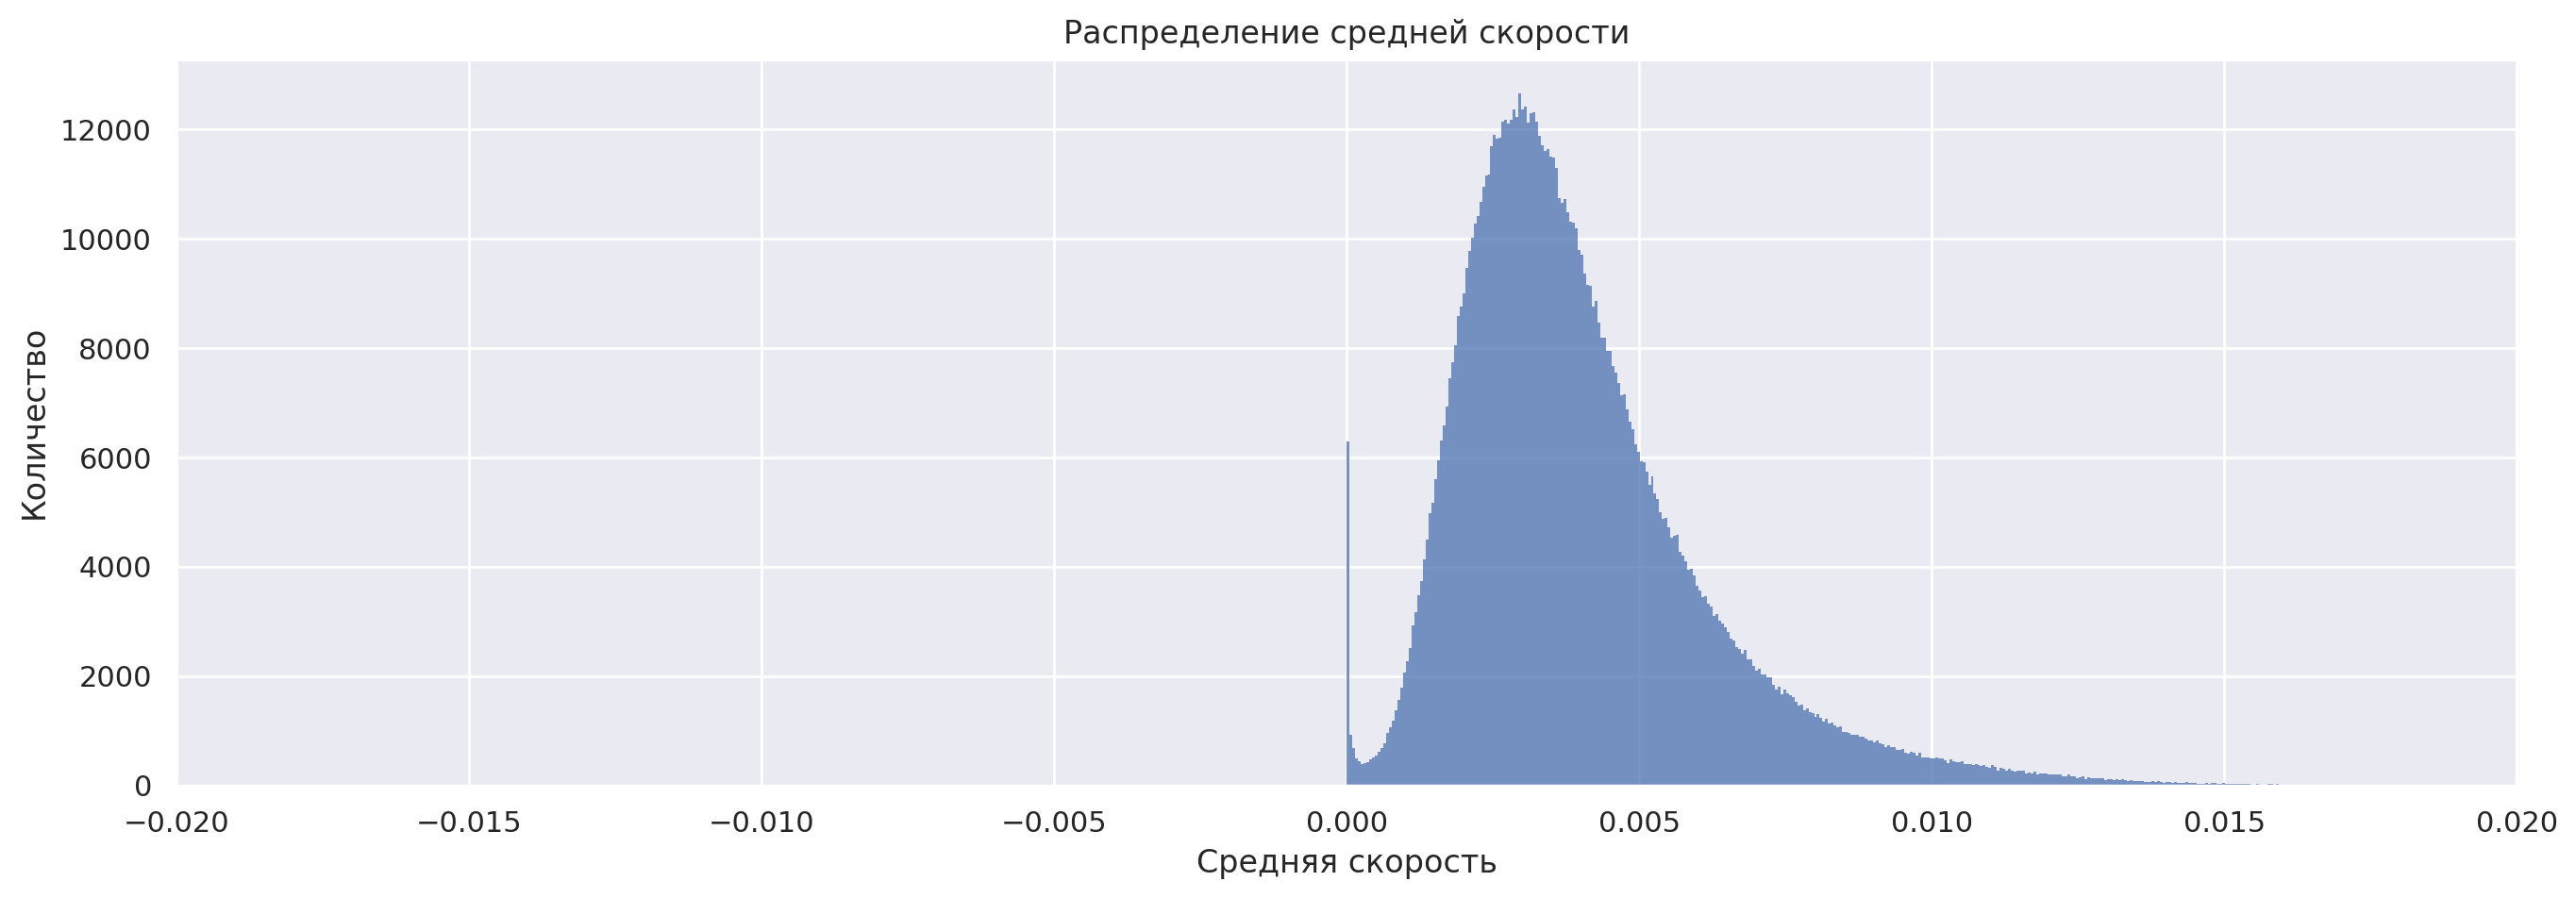

In [ ]:
train['average_speed'] = train['haversine'] / np.expm1(train['log_trip_duration'])
sns.histplot(train['average_speed']).set(title='Распределение средней скорости')
plt.ylabel('Количество')
plt.xlabel('Средняя скорость')
plt.xlim(-0.02, 0.02)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<ipython-input-117-78ca79131942>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q99 = train.quantile(q=0.99)['average_speed']


(-0.02, 0.02)

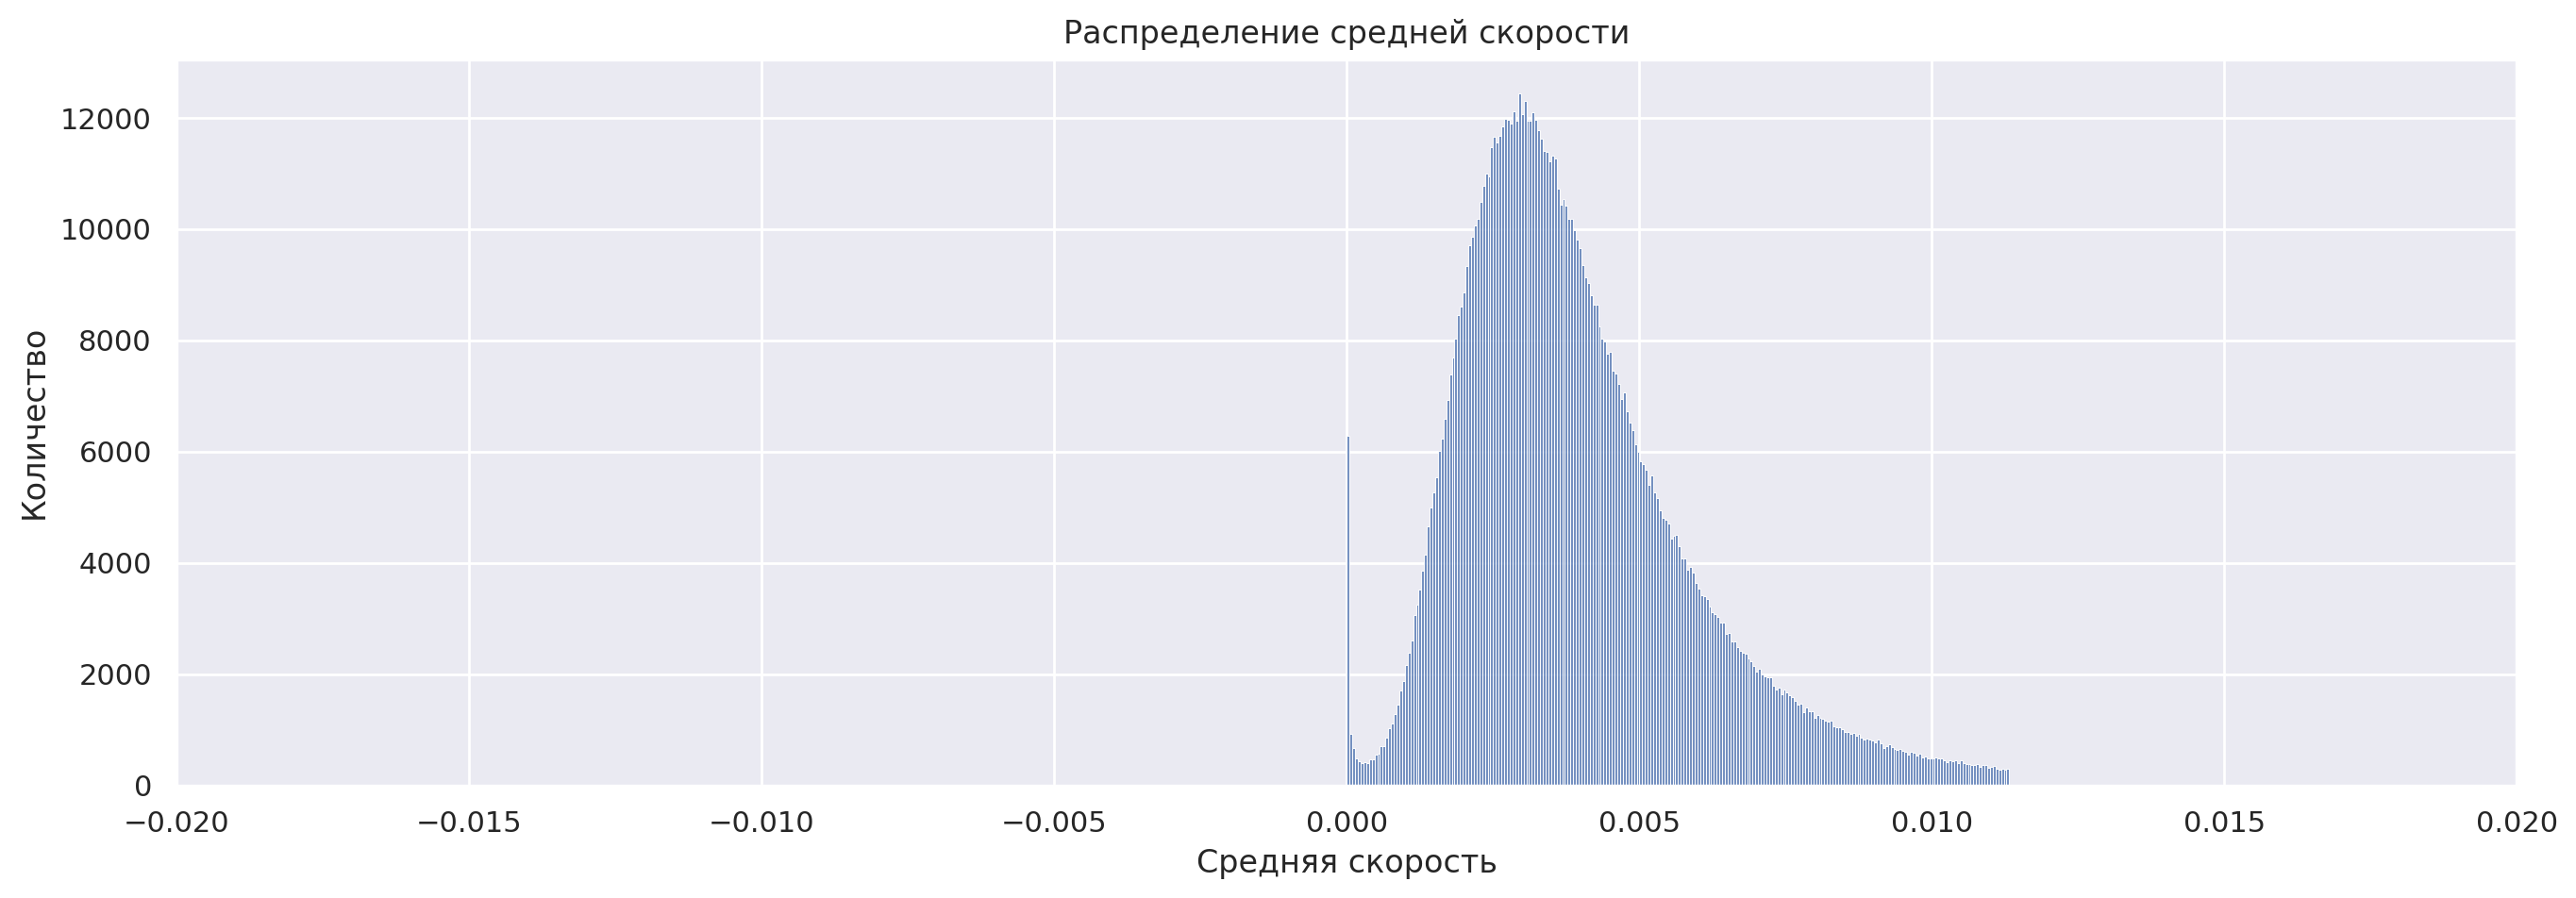

In [ ]:
q99 = train.quantile(q=0.99)['average_speed']
sns.histplot(train.loc[train['average_speed'] < q99, 'average_speed']).set(title='Распределение средней скорости')
plt.ylabel('Количество')
plt.xlabel('Средняя скорость')
plt.xlim(-0.02, 0.02)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-118-bca889ba9bac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kek = train.groupby(['day_of_week', 'hour']).median().reset_index().pivot(index='day_of_week', columns='hour', values='average_speed')


Text(0.5, 21.249999999999993, 'Час')

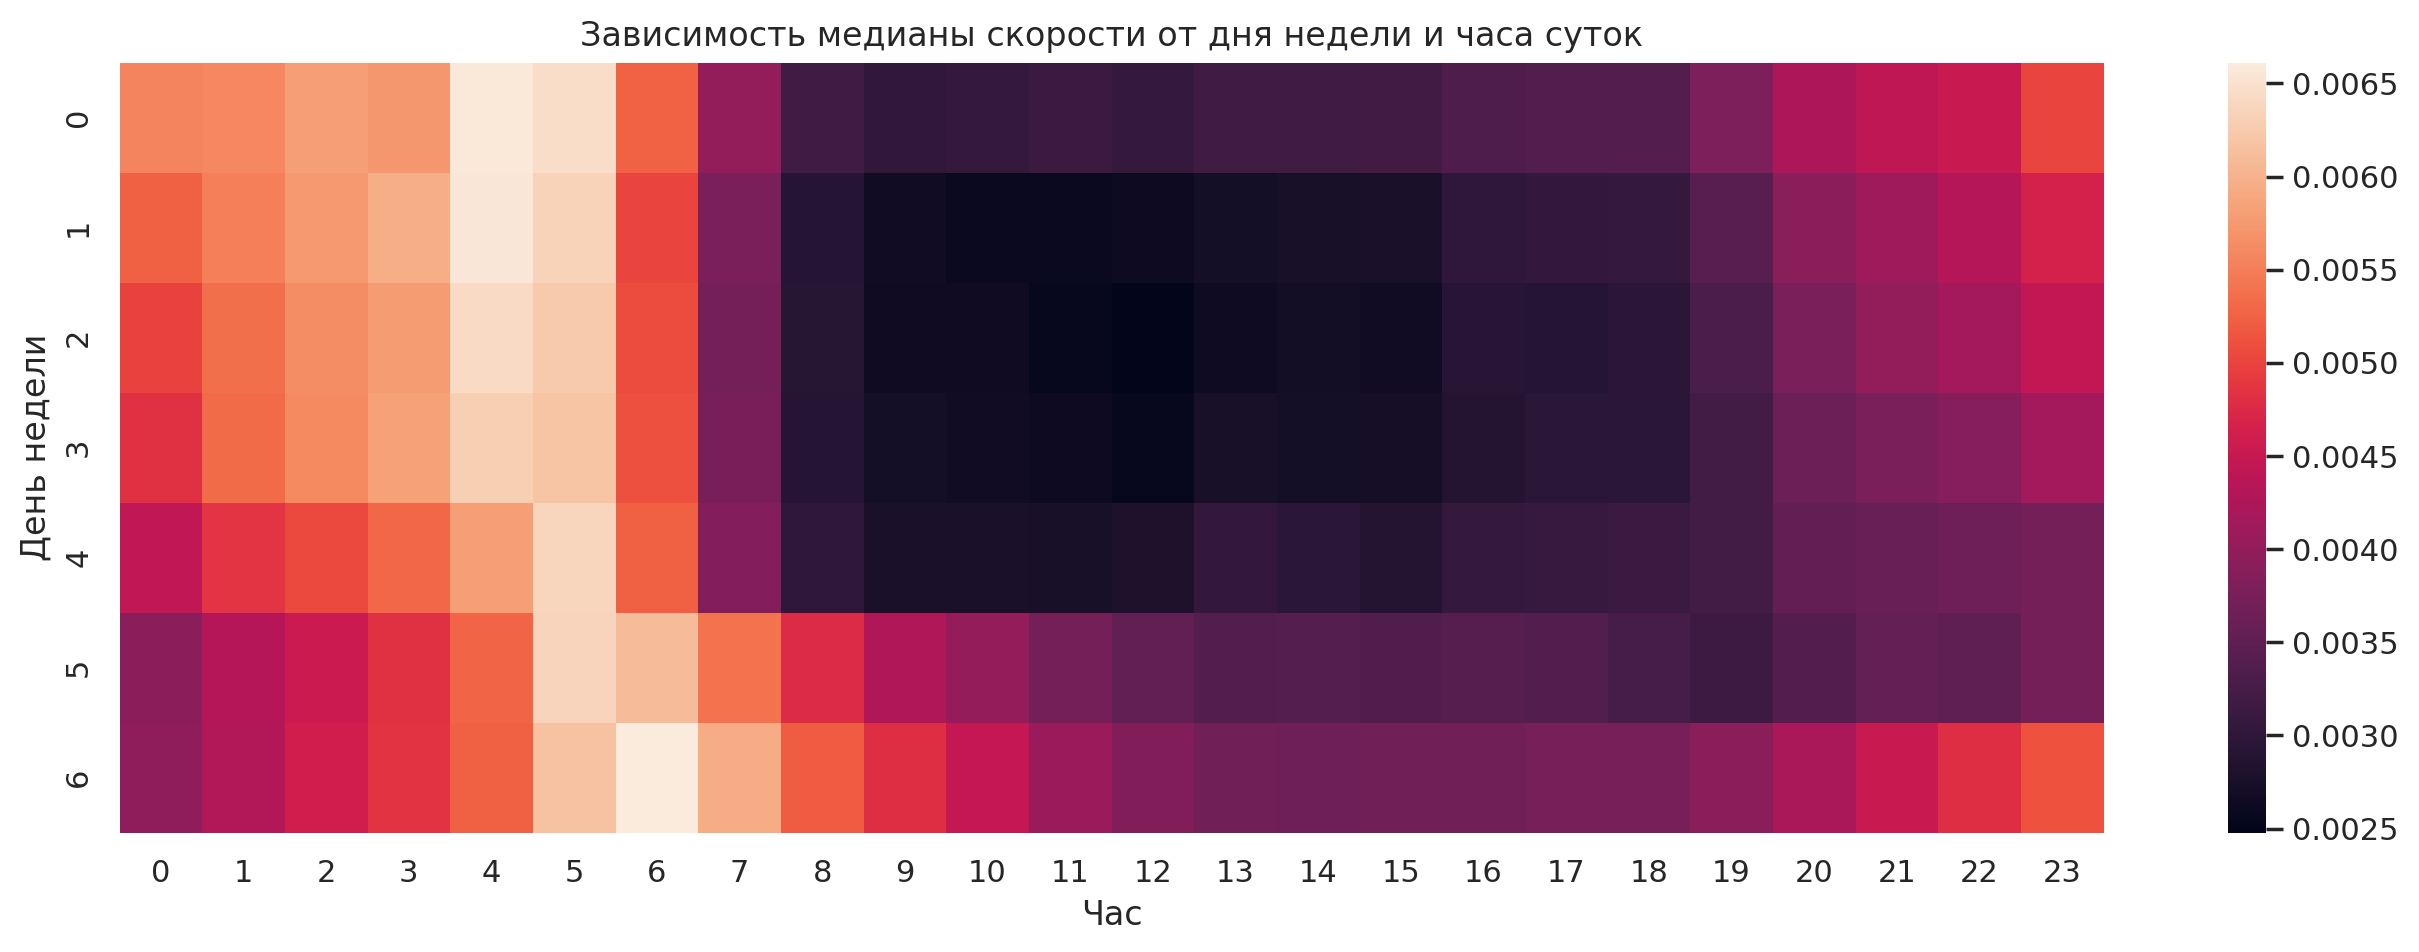

In [ ]:
kek = train.groupby(['day_of_week', 'hour']).median().reset_index().pivot(index='day_of_week', columns='hour', values='average_speed')
sns.heatmap(kek).set(title='Зависимость медианы скорости от дня недели и часа суток')
plt.ylabel('День недели')
plt.xlabel('Час')

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Ну мы вычислили average_speed в обучающей выборке уже зная log_trip_duration (а это таргет). А в тестовой выборке мы таргетом очевидно пользоваться не сможем

In [ ]:
train = train.drop(['average_speed'], axis=1)
train.head()

id  vendor_id     pickup_datetime  passenger_count  \
1397246  id1594548          1 2016-06-13 22:15:23                1   
1308206  id0707935          2 2016-06-02 02:12:10                6   
535789   id1025614          2 2016-02-17 14:21:19                1   
798332   id0047761          2 2016-02-29 21:08:06                1   
1313015  id3060811          2 2016-06-16 06:53:50                2   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1397246        -73.984726        40.737175         -74.000862   
1308206        -73.998650        40.717270         -73.868622   
535789         -73.982048        40.740261         -73.980057   
798332         -73.994102        40.759190         -73.977432   
1313015        -74.012299        40.701466         -73.990669   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  day_of_week  \
1397246         40.741886                  N           5.993961            0   
1308206         40.747570                  N           7.932003            3   
535789          40.751900                  N           6.489205            2   
798332          40.782902                  N           6.298949            0   
1313015         40.693214                  N           6.006353            3   

         month  hour  day_of_year  anomal  haversine  log_haversine  
1397246      6    22          165       0   1.456923       0.898910  
1308206      6     2          154       0  11.462460       2.522721  
535789       2    14           48       0   1.304986       0.835075  
798332       2    21           60       0   2.987097       1.383063  
1313015      6     6          168       0   2.041258       1.112271

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Минимальная скорость с 11 до 12 в среду. Максимальная в 6 утра в воскресенье

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [ ]:
train['start_when_traffic_jam'] = '0'
train['start_when_no_traffic'] = '0'
train.loc[((train['hour'] == 6) & (train['day_of_week'] == 6)) | ((train['day_of_week'].isin({0, 1})) & (train['hour'] == 4)), 'start_when_no_traffic'] = '1'
train.loc[train['hour'].isin({9, 10, 11, 12}) & (train['day_of_week'].isin({1, 2, 3})), 'start_when_traffic_jam'] = '1'
train['end_when_traffic_jam'] = '0'
train['end_when_no_traffic'] = '0'
train['trip_duration'] = np.expm1(train['log_trip_duration'])
train['trip_duration'] = train.apply(lambda row: timedelta(seconds=row['trip_duration']), axis=1)
train['dropoff_datetime'] = train['pickup_datetime'] + train['trip_duration']
train.loc[((train['dropoff_datetime'].dt.hour == 6) & (train['dropoff_datetime'].dt.day_of_week == 6)) | (train['dropoff_datetime'].dt.day_of_week.isin({0, 1}) & train['dropoff_datetime'].dt.hour == 4), 'end_when_no_traffic'] = '1'
train.loc[(train['dropoff_datetime'].dt.hour.isin({9, 10, 11, 12}) & train['dropoff_datetime'].dt.day_of_week.isin({1, 2, 3})), 'end_when_traffic_jam'] = '1'
train = train.drop(['trip_duration', 'dropoff_datetime'], axis=1)

test['start_when_traffic_jam'] = '0'
test['start_when_no_traffic'] = '0'
test.loc[((test['hour'] == 6) & (test['day_of_week'] == 6)) | ((test['day_of_week'].isin({0, 1})) & (test['hour'] == 4)), 'start_when_no_traffic'] = '1'
test.loc[test['hour'].isin({9, 10, 11, 12}) & (test['day_of_week'].isin({1, 2, 3})), 'start_when_traffic_jam'] = '1'
test['end_when_traffic_jam'] = '0'
test['end_when_no_traffic'] = '0'
test['trip_duration'] = np.expm1(test['log_trip_duration'])
test['trip_duration'] = test.apply(lambda row: timedelta(seconds=row['trip_duration']), axis=1)
test['dropoff_datetime'] = test['pickup_datetime'] + test['trip_duration']
test.loc[((test['dropoff_datetime'].dt.hour == 6) & (test['dropoff_datetime'].dt.day_of_week == 6)) | (test['dropoff_datetime'].dt.day_of_week.isin({0, 1}) & test['dropoff_datetime'].dt.hour == 4), 'end_when_no_traffic'] = '1'
test.loc[(test['dropoff_datetime'].dt.hour.isin({9, 10, 11, 12}) & test['dropoff_datetime'].dt.day_of_week.isin({1, 2, 3})), 'end_when_traffic_jam'] = '1'
test = test.drop(['trip_duration', 'dropoff_datetime'], axis=1)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

[Text(0.5, 1.0, 'log_trip_duration distribution with start_when_traffic_jam feature')]

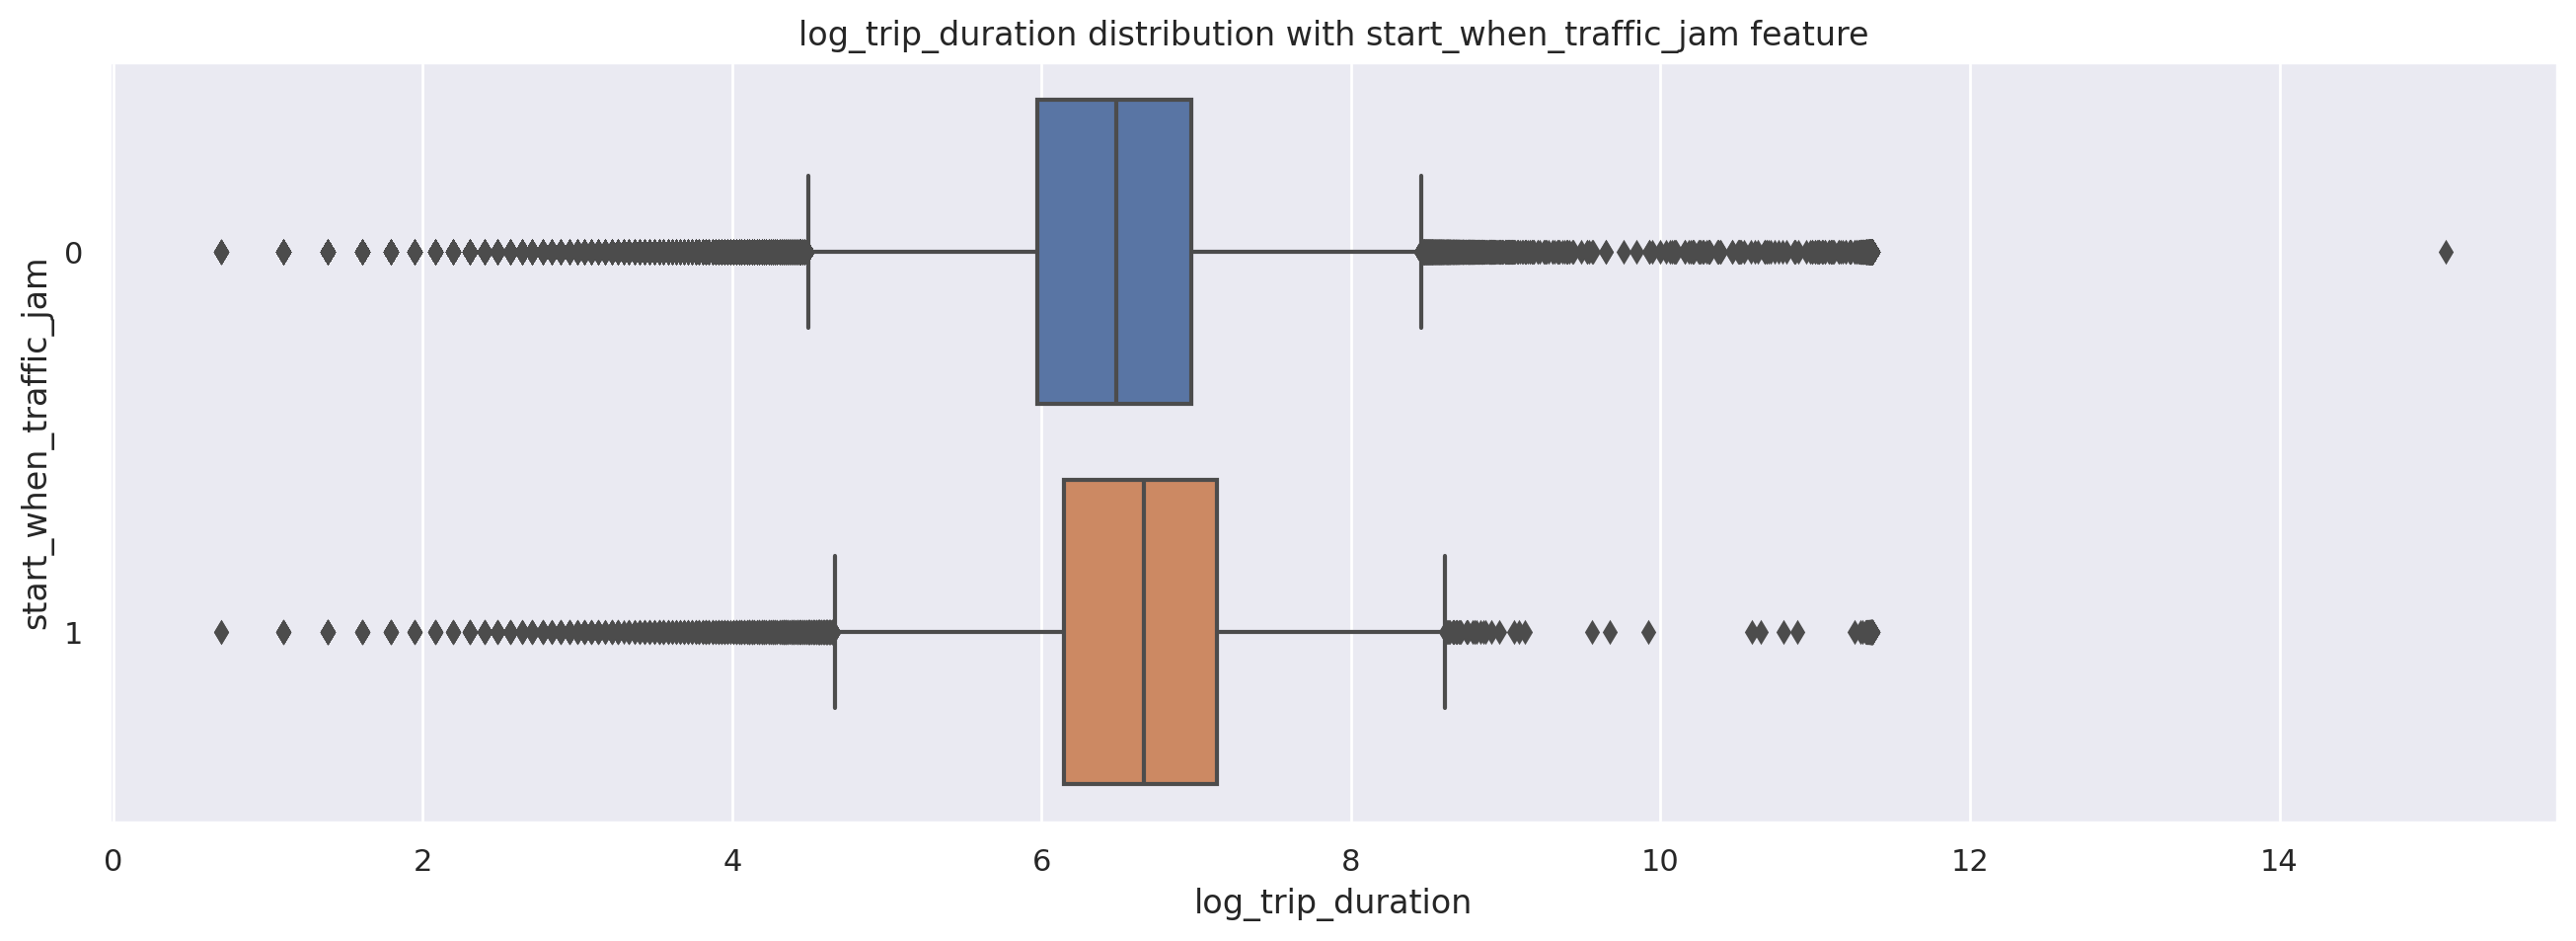

In [ ]:
sns.boxplot(data=train, x='log_trip_duration', y='start_when_traffic_jam').set(title='log_trip_duration distribution with start_when_traffic_jam feature')

[Text(0.5, 1.0, 'log_trip_duration distribution with end_when_traffic_jam feature')]

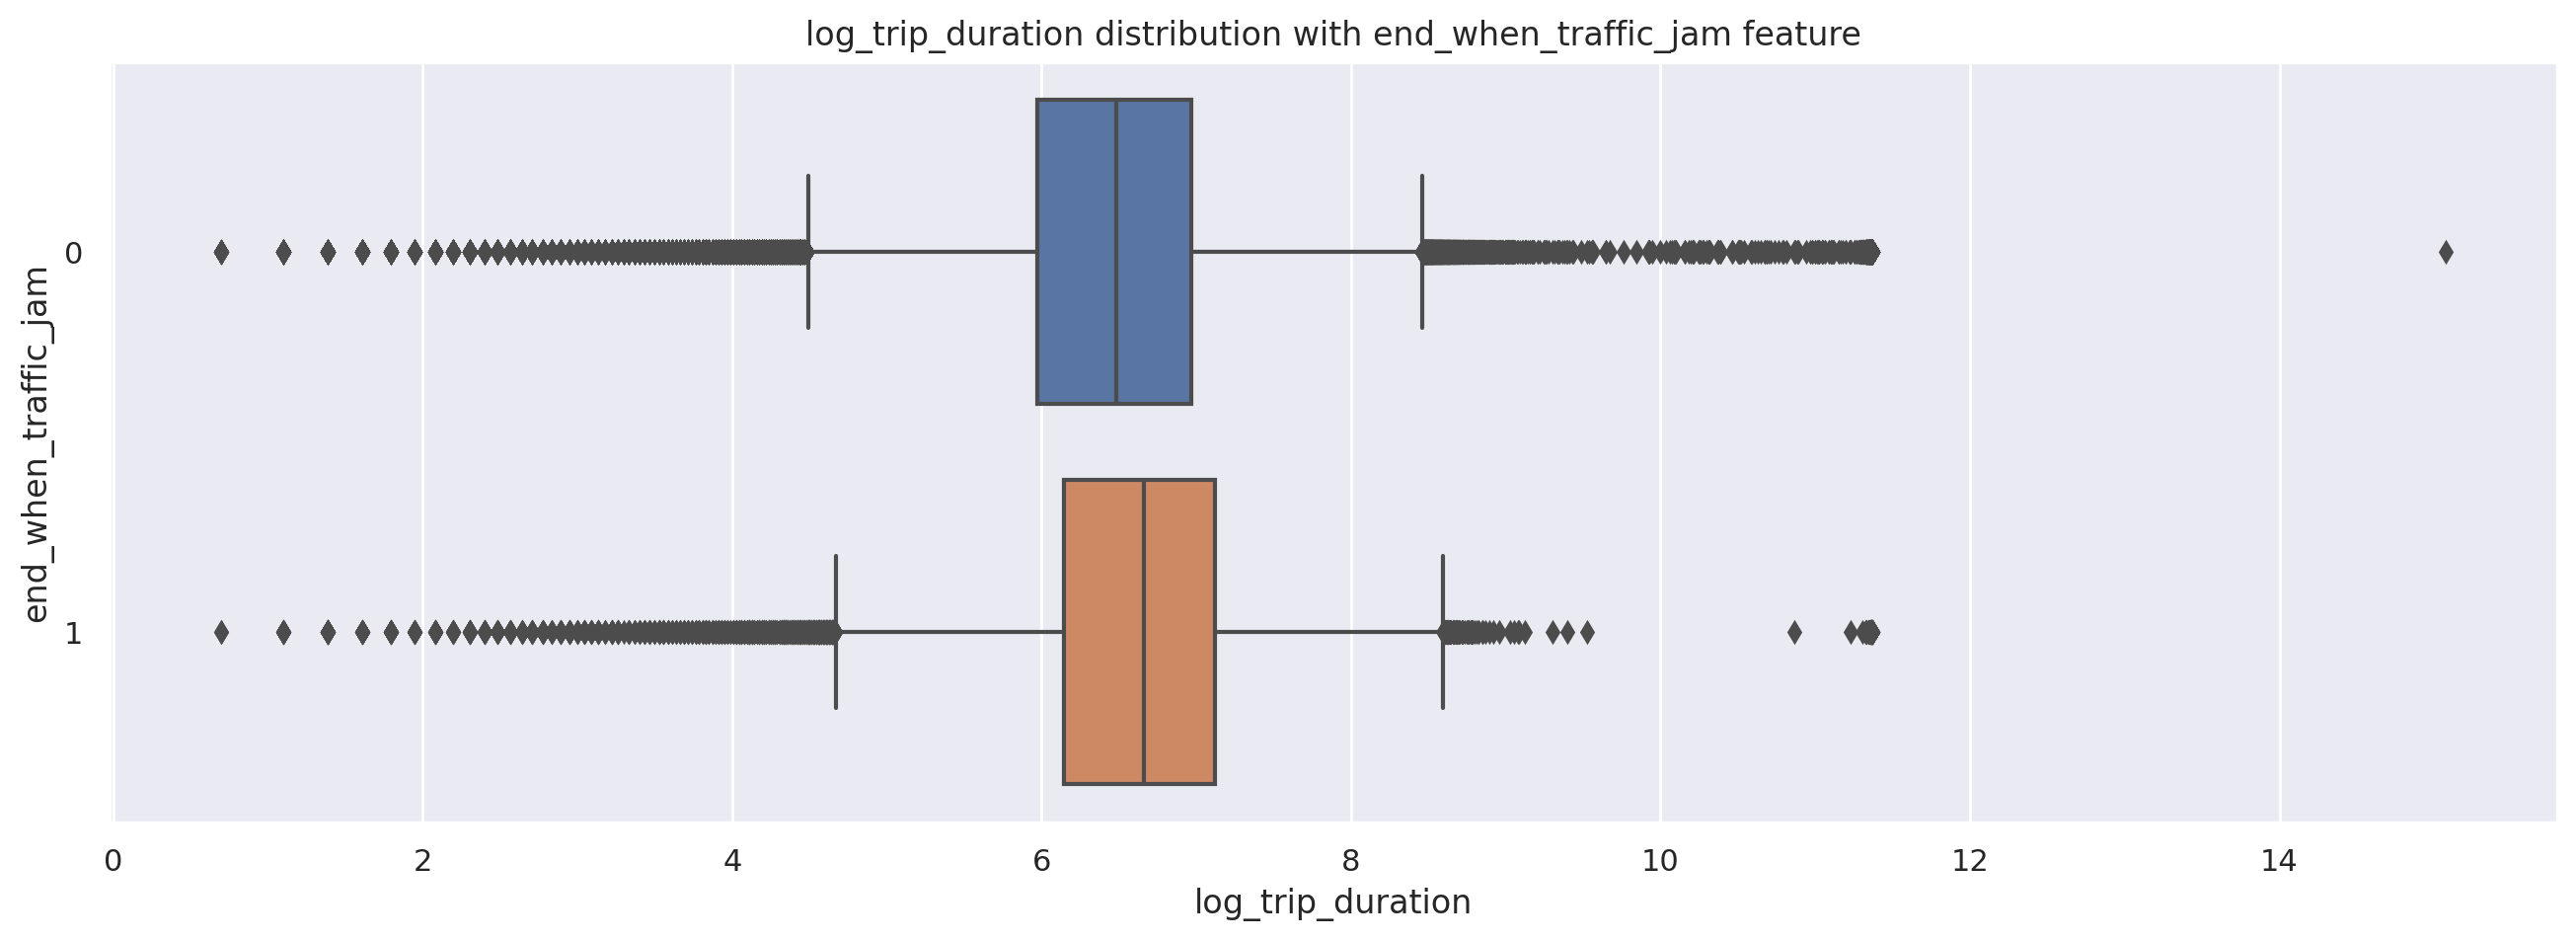

In [ ]:
sns.boxplot(data=train, x='log_trip_duration', y='end_when_traffic_jam').set(title='log_trip_duration distribution with end_when_traffic_jam feature')

[Text(0.5, 1.0, 'log_trip_duration distribution with start_when_no_traffic feature')]

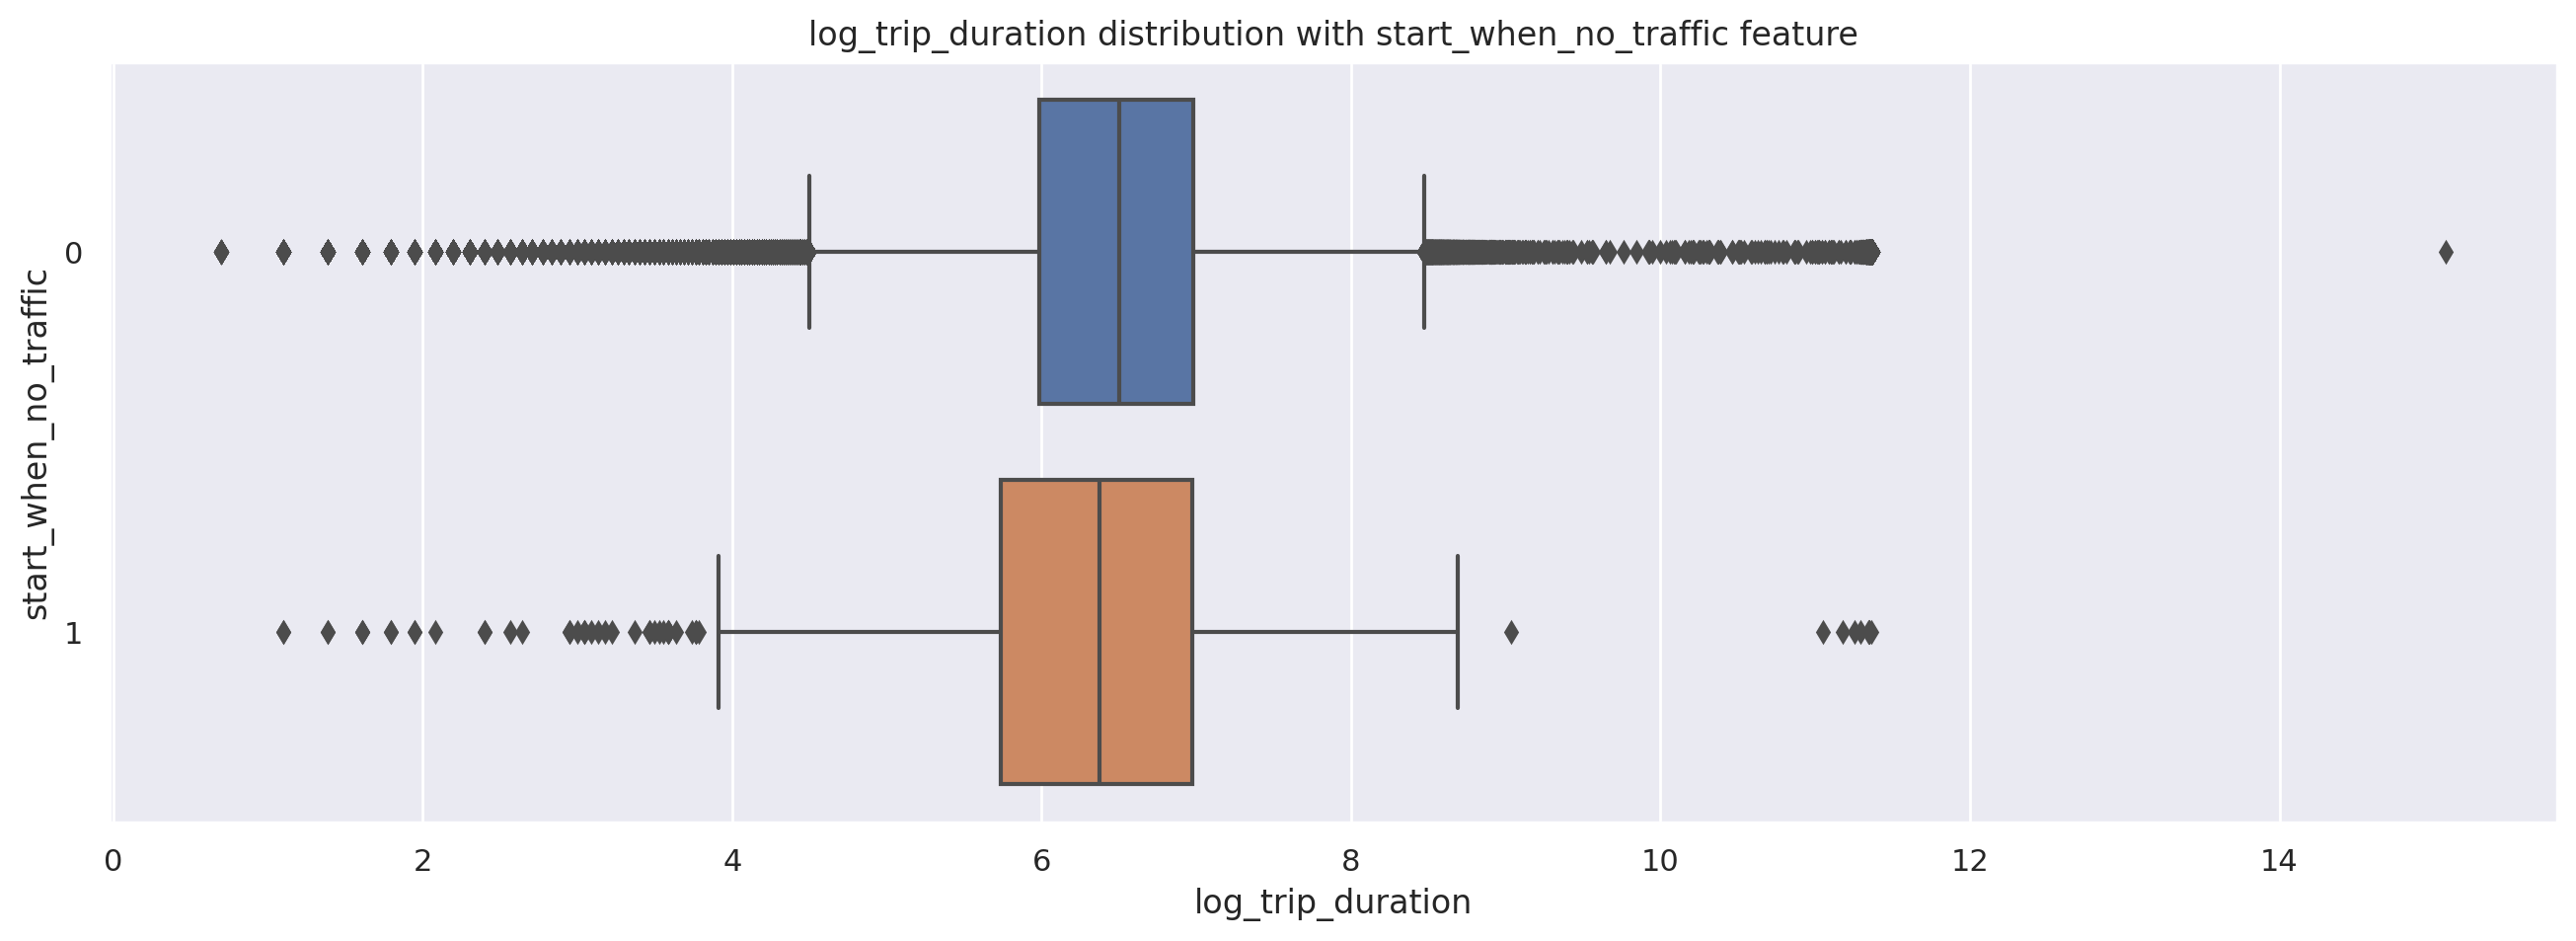

In [ ]:
sns.boxplot(data=train, x='log_trip_duration', y='start_when_no_traffic').set(title='log_trip_duration distribution with start_when_no_traffic feature')

[Text(0.5, 1.0, 'log_trip_duration distribution with end_when_no_traffic feature')]

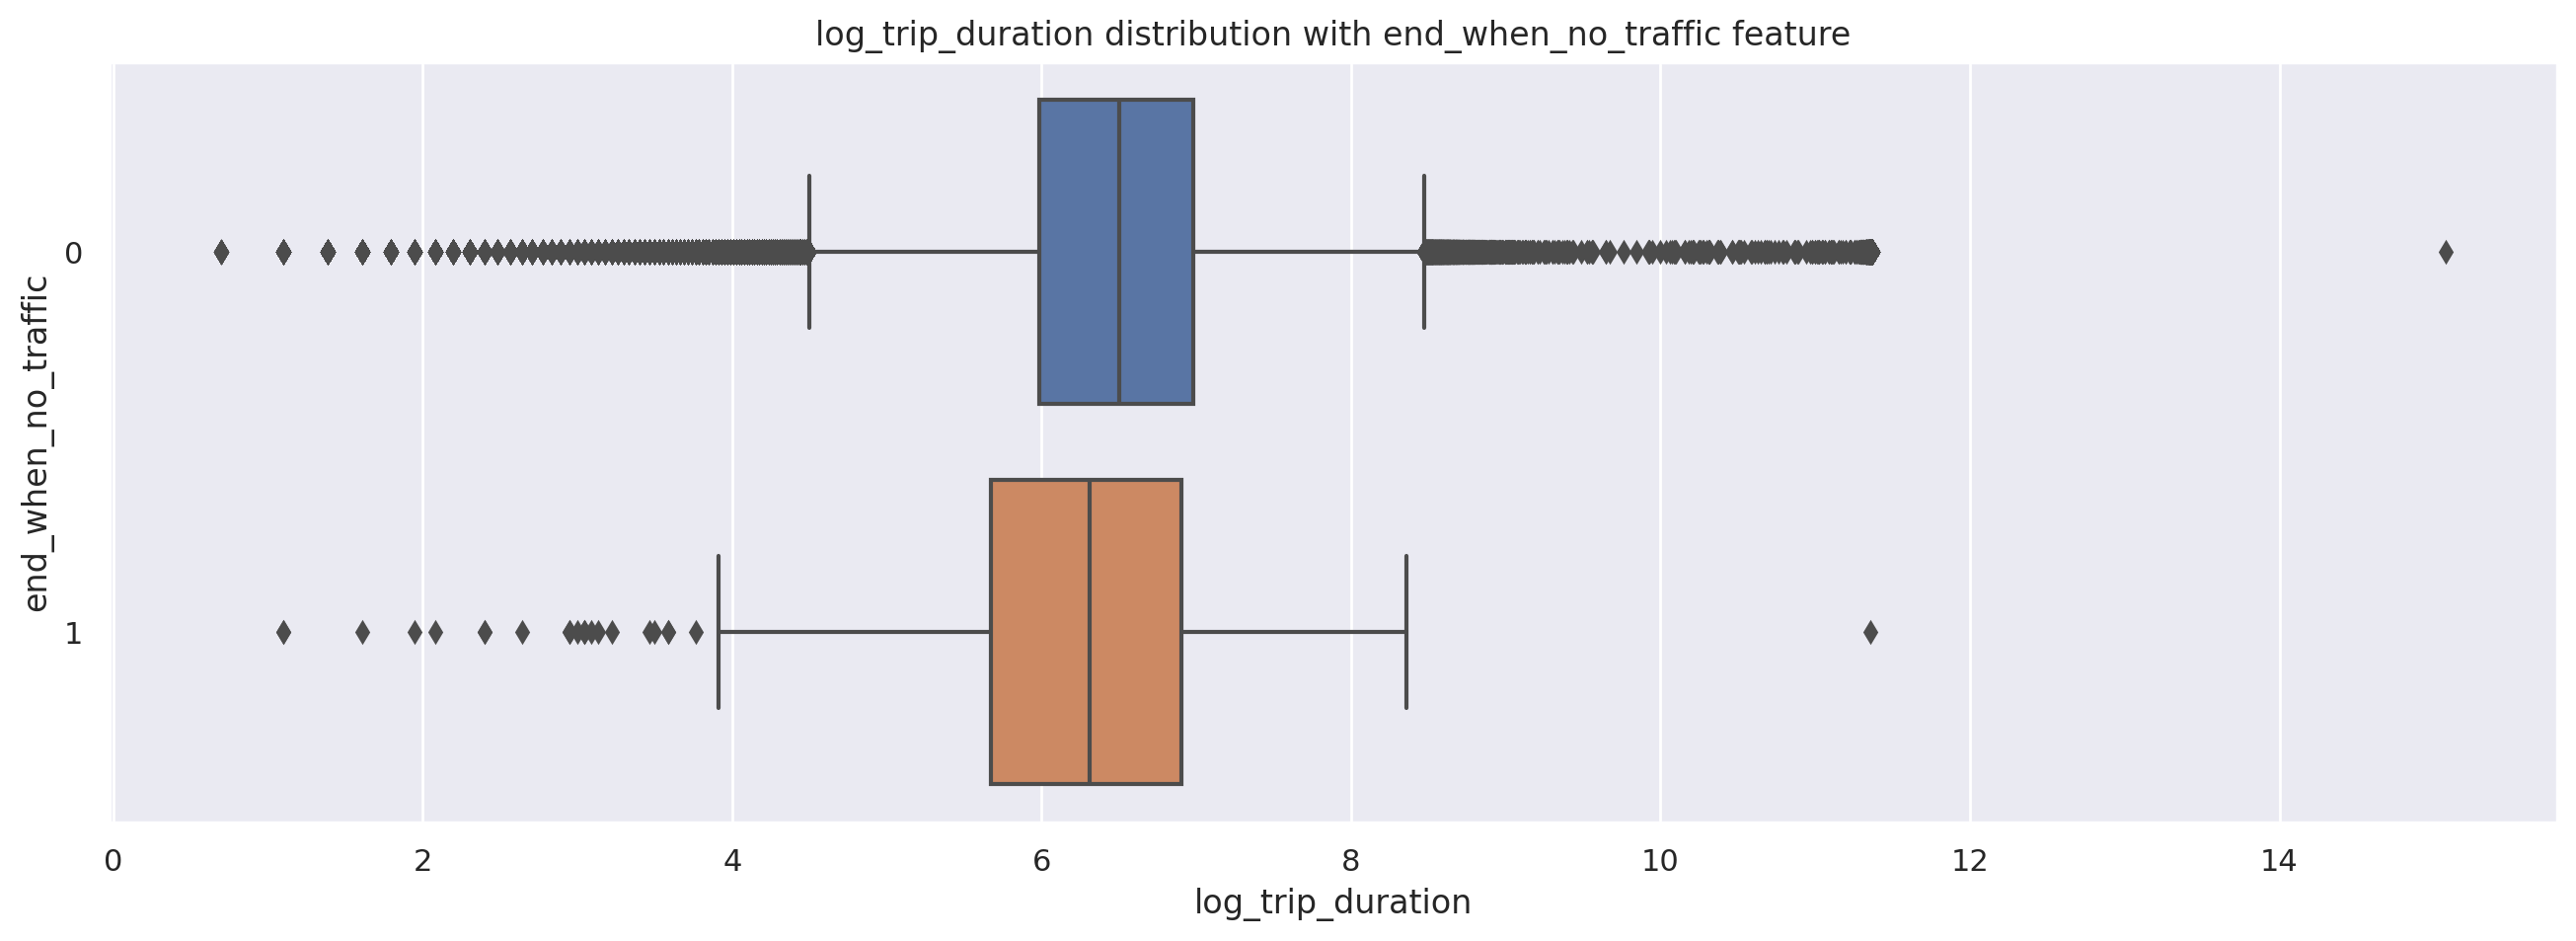

In [ ]:
sns.boxplot(data=train, x='log_trip_duration', y='end_when_no_traffic').set(title='log_trip_duration distribution with end_when_no_traffic feature')

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Кажется, что если поездка стартуем в некотором особенном промежутке времени , то она в нем и заканчивается. Так что start_when_traffic_jam очень похож на end_when_traffic_jam и start_when_no_traffic очень похож на end_when_no_traffic.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, folium_map):
        self.fmap = folium_map
        self.base_y = 40.81
        self.base_x = -74.02
        self.step_x = 0.006
        self.step_y = 0.006
        self.x_points = []
        self.y_points = []
        self.n = 17
        self.m = 19
        for i in range(self.n):
            self.x_points.append(self.base_x + i * self.step_x)
        for i in range(self.m):
            self.y_points.append(self.base_y - i * self.step_y)
        self.x_points.sort()
        self.y_points.sort(reverse=True)
        for i in range(self.n):
            for j in range(self.m):
                folium.Circle(radius=100, location=(self.y_points[j], self.x_points[i]), color='red', fill_color='red', fill=True).add_to(self.fmap)

    def show_map(self):
        return self.fmap

    def get_y(self, latitude):
        # print(latitude)
        # print(self.y_points)
        for i in range(len(self.y_points) - 1):
            if self.y_points[i] >= latitude and latitude > self.y_points[i + 1]:
                # print(i)
                return i + 1
        # print(-1)
        return -1

    def get_x(self, longitude):
        # print(longitude)
        # print(self.x_points)
        for i in range(len(self.x_points) - 1):
            if self.x_points[i] <= longitude and longitude < self.x_points[i + 1]:
                # print(i)
                return i + 1
        # print(-1)
        return -1

    def get_square(self, latitude, longitude):
        x, y = self.get_x(longitude), self.get_y(latitude)
        # print(x, y)
        if x == -1 or y == -1:
            return -1
        return x + (self.n - 1) * y

    def fit(self, X=None, y=None):
        self.start_arr = [-1 for _ in range(X.shape[0])]
        self.end_arr = [-1 for _ in range(X.shape[0])]
        for i in range(X.shape[0]):
            # folium.Circle(radius=100, location=(X.iloc[i, :]['pickup_latitude'], X.iloc[i, :]['pickup_longitude']), color='green', fill_color='green', fill=True).add_to(m)
            self.start_arr[i] = self.get_square(X.iloc[i, :]['pickup_latitude'], X.iloc[i, :]['pickup_longitude'])
            # print(self.start_arr[i])
            # folium.Circle(radius=100, location=(X.iloc[i, :]['dropoff_latitude'], X.iloc[i, :]['dropoff_longitude']), color='black', fill_color='black', fill=True).add_to(m)
            self.end_arr[i] = self.get_square(X.iloc[i, :]['dropoff_latitude'], X.iloc[i, :]['dropoff_longitude'])
            # print(self.end_arr[i])
        # self.start_col = pd.DataFrame(data={'start_region': start_arr})
        # self.end_col = pd.DataFrame(data={'end_region': end_arr})
        return self

    def transform(self, X, y=None):
        transformed = X.copy()
        transformed.insert(transformed.shape[1], 'start_region', self.start_arr)
        transformed.insert(transformed.shape[1], 'end_region', self.end_arr)
        return transformed

In [ ]:
m = show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")
tr = MapGridTransformer(m)
# kek = train.sample(1)
# tr.fit(kek)
tr.show_map()

In [ ]:
if 'start_region' in train.columns:
    train = train.drop(['start_region', 'end_region'], axis=1)
    test = test.drop(['start_region', 'end_region'], axis=1)
train = tr.fit_transform(train)
test = tr.fit_transform(test)

In [ ]:
test.head()

id  vendor_id     pickup_datetime  passenger_count  \
1064116  id2530603          1 2016-05-20 07:19:14                1   
1013387  id2993478          1 2016-05-27 15:23:23                1   
210860   id1972465          2 2016-02-09 11:59:38                5   
1127167  id2057045          2 2016-01-20 17:30:39                1   
331148   id1108777          2 2016-06-15 10:53:31                5   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1064116        -73.991379        40.765293         -73.988098   
1013387        -74.007057        40.705444         -73.793671   
210860         -73.988853        40.718922         -73.991859   
1127167        -73.971428        40.797649         -73.980087   
331148         -73.963028        40.772301         -73.980087   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  ...  month  \
1064116         40.769821                  N           4.043051  ...      5   
1013387         40.644711                  N           8.367532  ...      5   
210860          40.725891                  N           5.924256  ...      2   
1127167         40.785740                  N           5.929589  ...      1   
331148          40.760651                  N           7.021976  ...      6   

         hour  day_of_year  anomal  start_when_traffic_jam  \
1064116     7          141       0                       0   
1013387    15          148       0                       0   
210860     11           40       0                       1   
1127167    17           20       0                       0   
331148     10          167       0                       1   

        start_when_no_traffic end_when_traffic_jam end_when_no_traffic  \
1064116                     0                    0                   0   
1013387                     0                    0                   0   
210860                      0                    1                   0   
1127167                     0                    0                   0   
331148                      0                    1                   0   

        start_region  end_region  
1064116          133         118  
1013387          291          -1  
210860           262         245  
1127167           57          87  
331148           122         151  

[5 rows x 21 columns]

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

mapa = folium.Map(location=(40.788, -74.015))

X_train = train.drop(['log_trip_duration'], axis=1)
y_train = train.loc[:, 'log_trip_duration']
X_test = test.drop(['log_trip_duration'], axis=1)
y_test = test.loc[:, 'log_trip_duration']

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'start_when_traffic_jam', 'start_when_no_traffic', 'end_when_traffic_jam', 'end_when_no_traffic', 'start_region', 'end_region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7260831417557942
constant rmsle:  0.7957592365411509


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: `vendor_id` - например, у одного вендора машины могут быть новее и, как следствие, длина поездки меньше.
`passenger_count` - например, чем больше людей, тем, вероятней медленней будем ехать (машина же тяжелее будет)
`store_and_fwd_flag` - не понял че это

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
print("Уникальных vendor_id: ", train['vendor_id'].nunique())
print("Уникальных store_and_fwd_flag: ", train['store_and_fwd_flag'].nunique())
print("Уникальных passenger_count: ", train['passenger_count'].nunique())

Уникальных vendor_id:  2
Уникальных store_and_fwd_flag:  2
Уникальных passenger_count:  9


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0, 0.5, 'Значение store_and_fwd_flag')

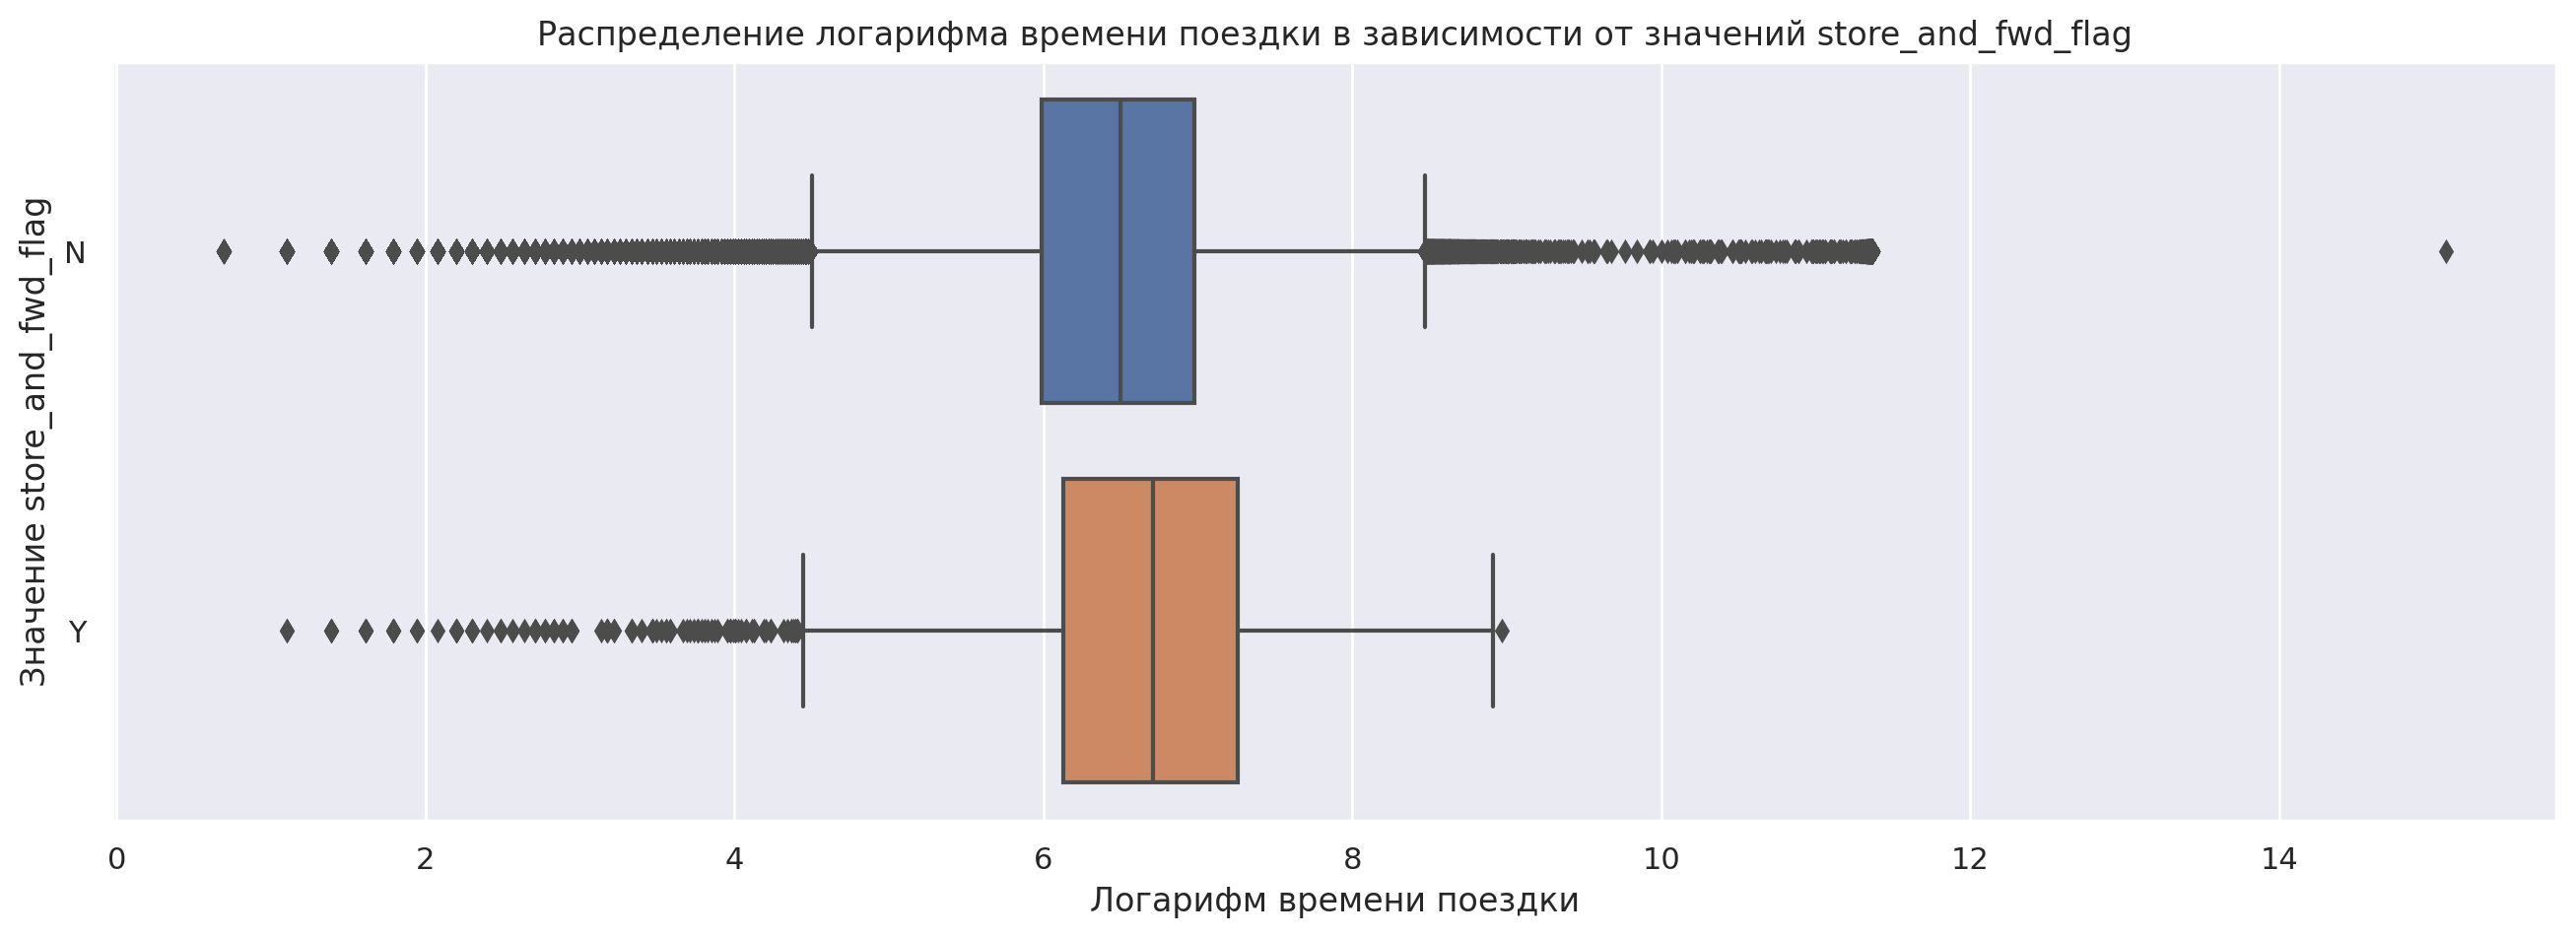

In [ ]:
sns.boxplot(data=train, x='log_trip_duration', y='store_and_fwd_flag').set(title='Распределение логарифма времени поездки в зависимости от значений store_and_fwd_flag')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Значение store_and_fwd_flag')

Text(0, 0.5, 'Значение vendor_id')

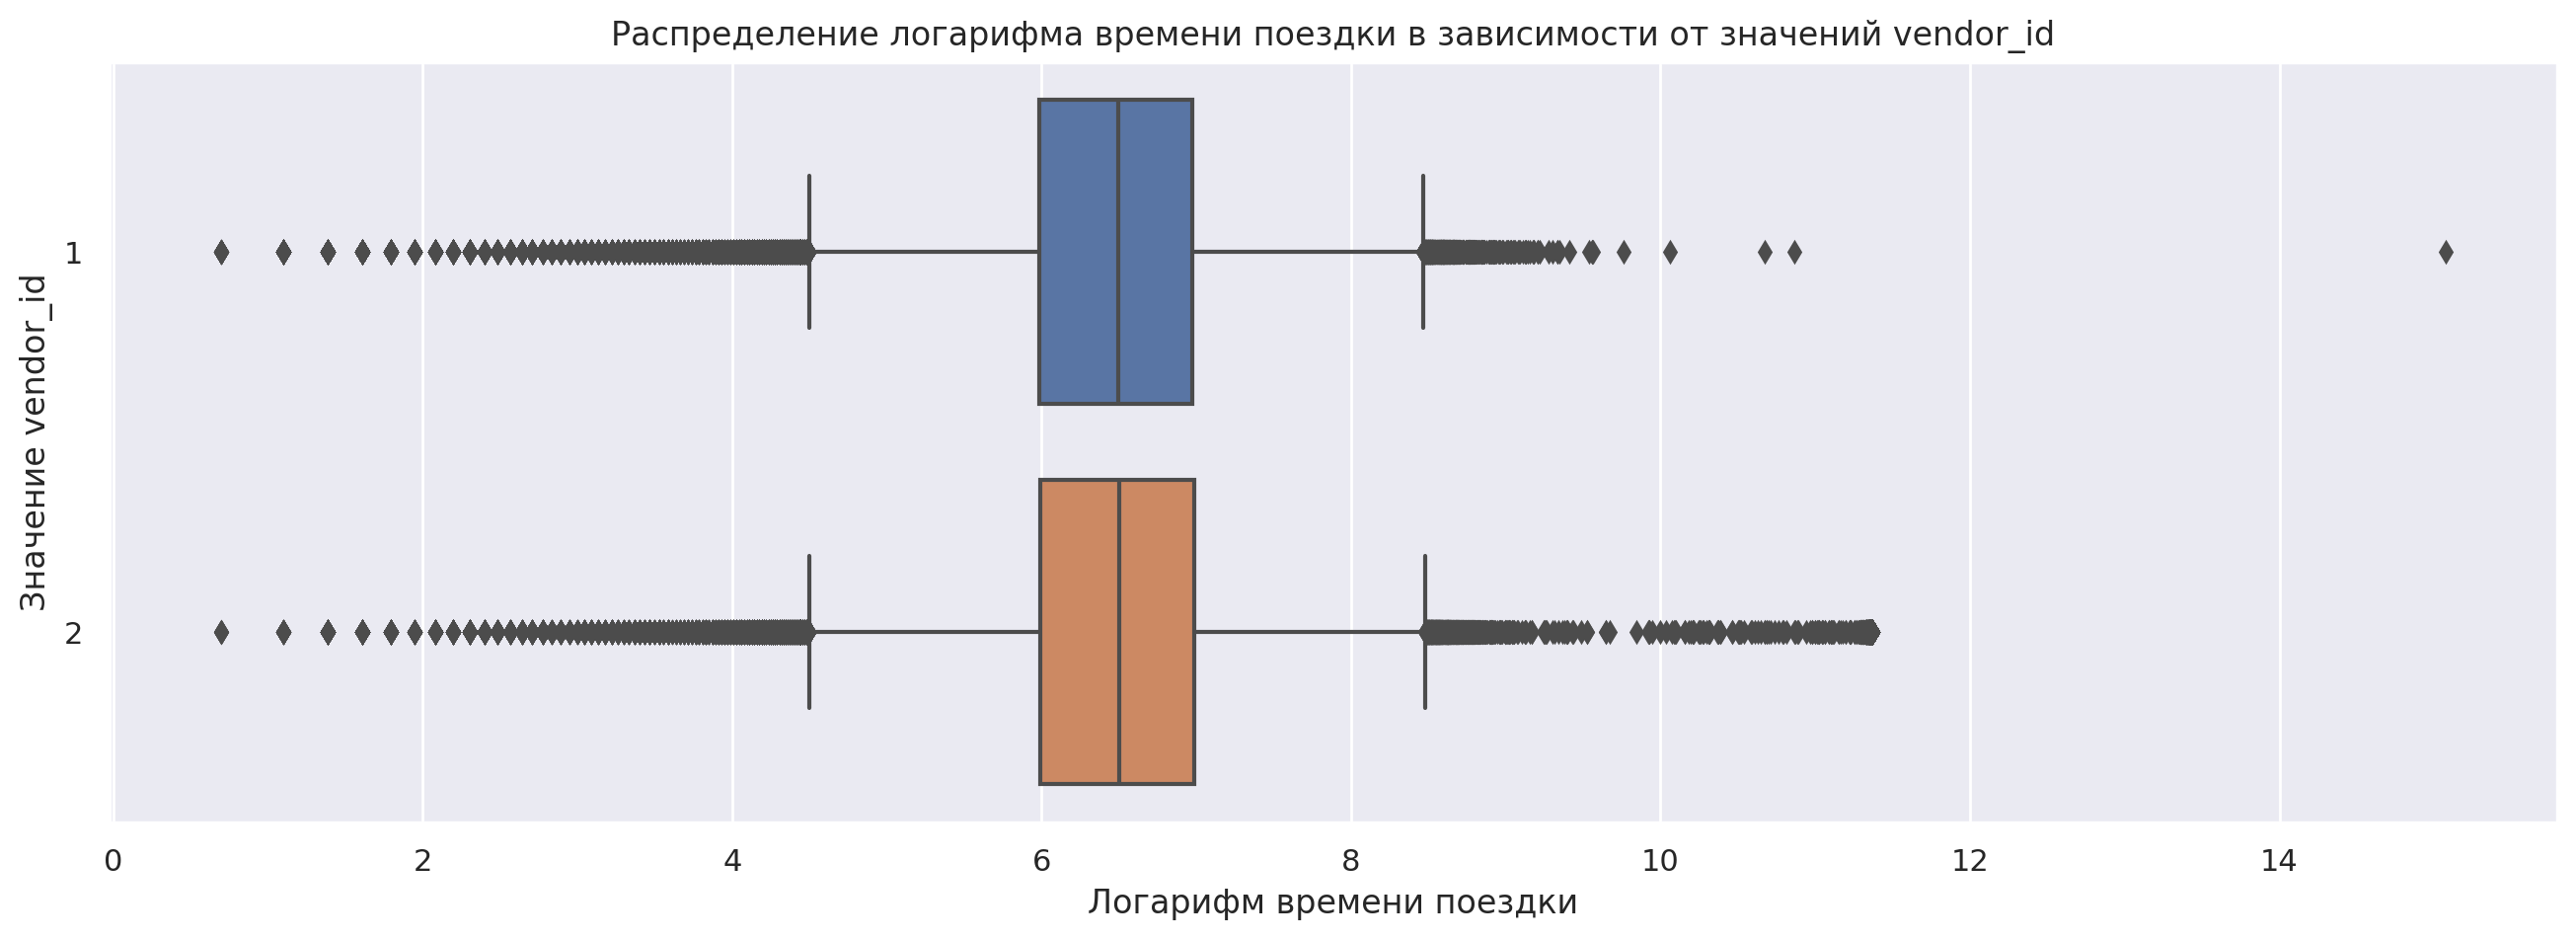

In [ ]:
# если не переводить в строку, то выводит какую-то хрень
train['str_vendor_id'] = train.apply(lambda row: str(row['vendor_id']), axis=1)
sns.boxplot(data=train, x='log_trip_duration', y='str_vendor_id').set(title='Распределение логарифма времени поездки в зависимости от значений vendor_id')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Значение vendor_id')

Text(0, 0.5, 'Значение passenger_count')

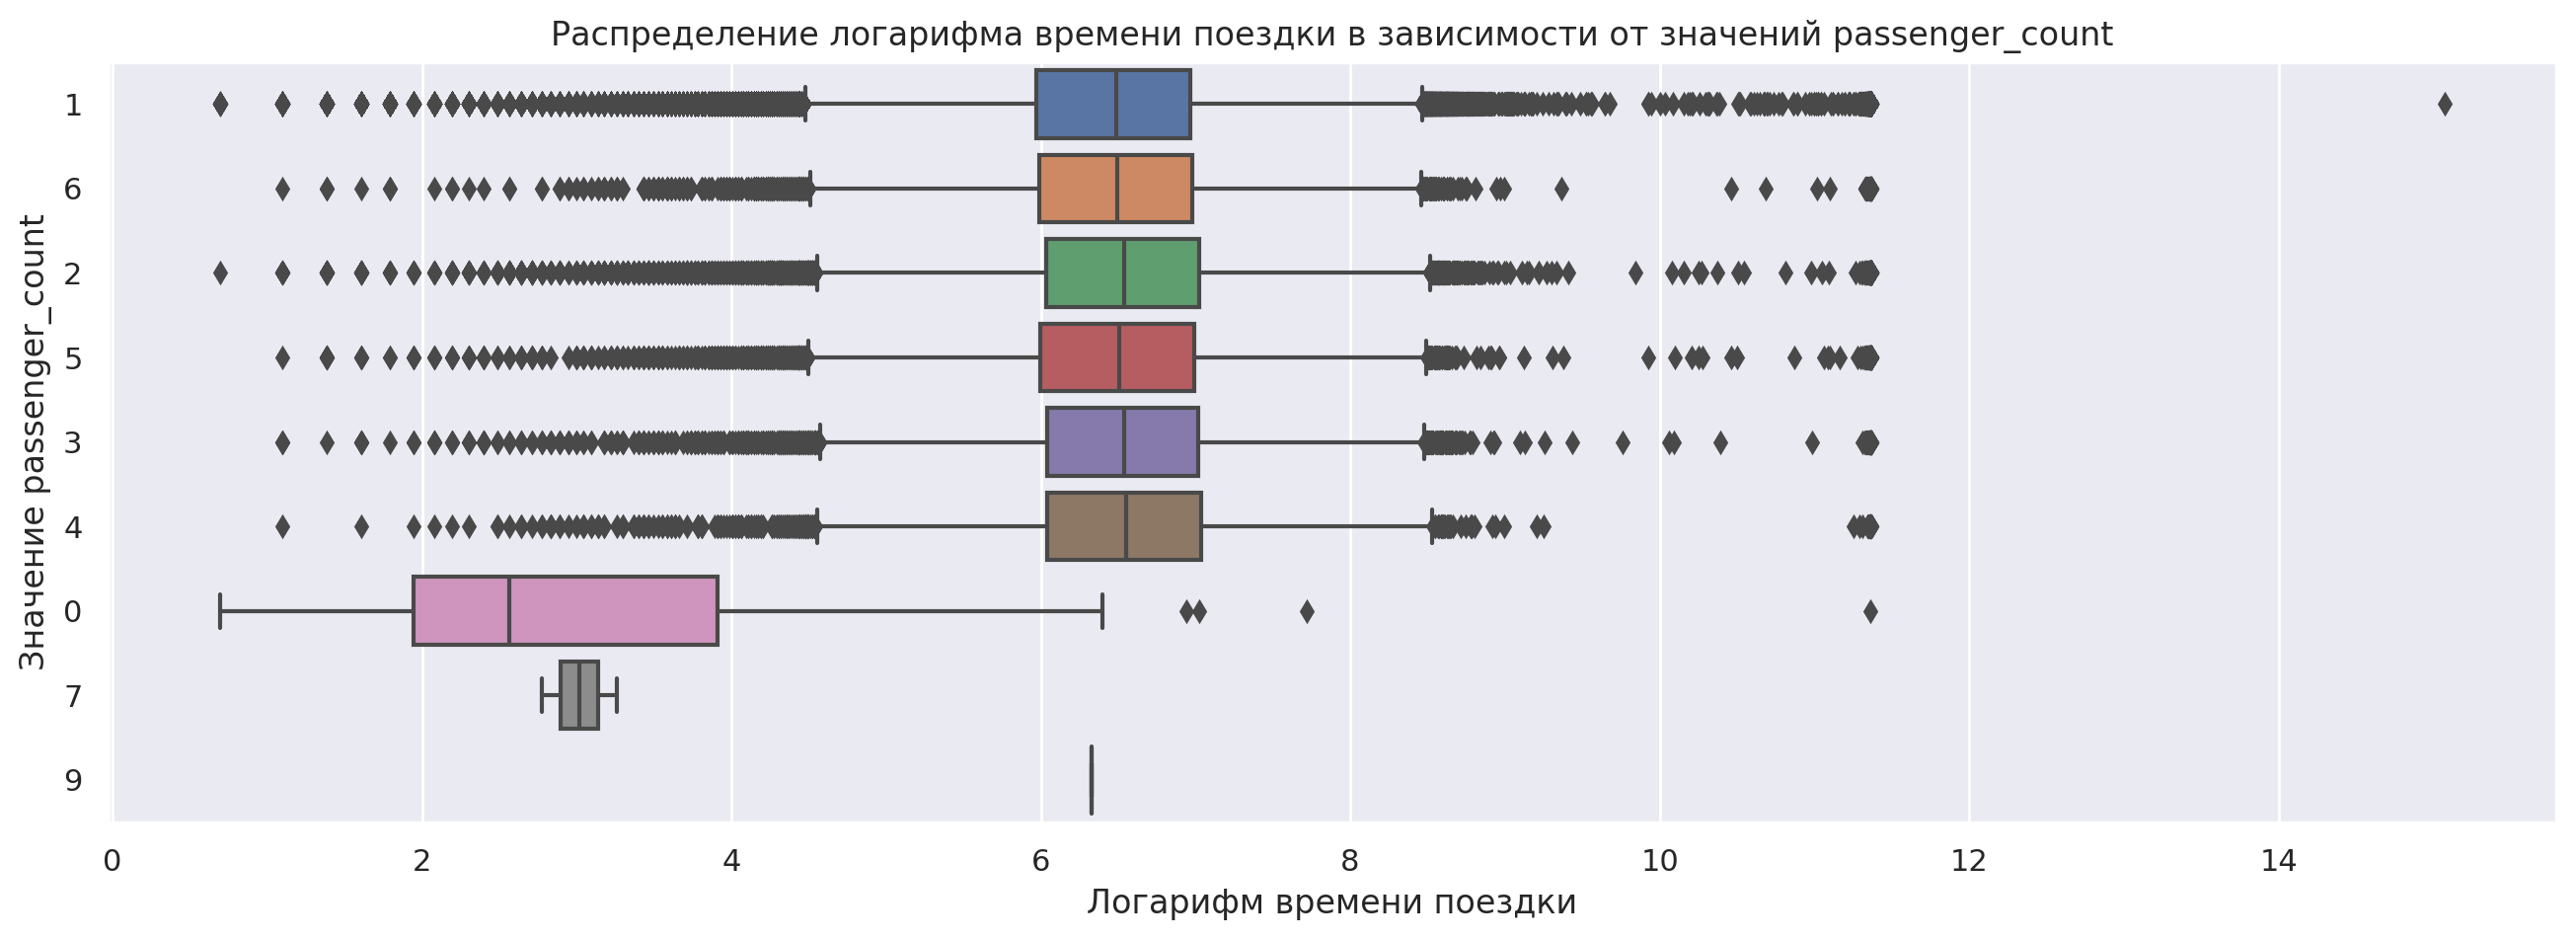

In [ ]:
train['str_passenger_count'] = train.apply(lambda row: str(row['passenger_count']), axis=1)
sns.boxplot(data=train, x='log_trip_duration', y='str_passenger_count').set(title='Распределение логарифма времени поездки в зависимости от значений passenger_count')
plt.xlabel('Логарифм времени поездки')
plt.ylabel('Значение passenger_count')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
train_ = train.copy()
test_ = test.copy()
train_['vendor_id'] = train_['vendor_id'] - 1
train_['store_and_fwd_flag'] = train_.apply(lambda row: 0 if row['store_and_fwd_flag'] == 'N' else 1, axis=1)
test_['vendor_id'] = test_['vendor_id'] - 1
test_['store_and_fwd_flag'] = test_.apply(lambda row: 0 if row['store_and_fwd_flag'] == 'N' else 1, axis=1)
train_.sample(15)

id  vendor_id     pickup_datetime  passenger_count  \
659273   id1969869          0 2016-04-23 16:48:00                1   
345082   id0001938          1 2016-03-12 22:23:20                1   
1369604  id0118114          0 2016-02-08 20:47:37                1   
1050499  id2916344          0 2016-02-25 14:32:30                2   
48449    id1481664          0 2016-01-28 19:51:30                1   
140022   id3119080          0 2016-03-23 12:43:22                1   
761111   id0358345          0 2016-01-08 07:55:50                1   
701006   id2131223          1 2016-03-12 21:02:22                1   
1263341  id2517887          1 2016-05-18 22:23:23                2   
1385323  id1236295          1 2016-01-13 13:09:31                5   
702814   id2399357          1 2016-01-29 18:56:32                1   
947620   id2304492          1 2016-05-20 18:48:33                2   
1079554  id2549440          1 2016-03-01 18:46:45                1   
228855   id1252048          0 2016-04-23 02:47:39                1   
447526   id2892075          0 2016-04-22 03:19:28                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
659273         -73.982513        40.773441         -73.967979   
345082         -73.982887        40.759472         -73.983353   
1369604        -73.981522        40.760509         -73.977432   
1050499        -73.955681        40.779305         -73.962181   
48449          -73.994270        40.726604         -73.980850   
140022         -73.977203        40.757866         -73.982964   
761111         -73.974747        40.783356         -73.983978   
701006         -73.984329        40.746414         -73.810913   
1263341        -73.986557        40.732109         -73.980843   
1385323        -73.974693        40.762245         -73.973228   
702814         -73.999199        40.749382         -74.000191   
947620         -73.987572        40.719780         -73.998779   
1079554        -73.969238        40.753750         -73.949944   
228855         -73.980797        40.729855         -73.982735   
447526         -73.986244        40.747227         -74.015038   

         dropoff_latitude  store_and_fwd_flag  log_trip_duration  ...  \
659273          40.760696                   0           6.104793  ...   
345082          40.747051                   0           6.248043  ...   
1369604         40.745419                   0           6.265301  ...   
1050499         40.774673                   0           5.620401  ...   
48449           40.759350                   0           7.138073  ...   
140022          40.760395                   0           6.393591  ...   
761111          40.774807                   0           5.786897  ...   
701006          40.765003                   0           7.261225  ...   
1263341         40.771568                   0           7.060476  ...   
1385323         40.751194                   0           6.220590  ...   
702814          40.728691                   0           6.836259  ...   
947620          40.734138                   0           6.863803  ...   
1079554         40.785542                   0           6.795706  ...   
228855          40.722858                   0           5.472271  ...   
447526          40.642494                   0           7.310550  ...   

         haversine  log_haversine  start_when_traffic_jam  \
659273    1.872574       1.055208                       0   
345082    1.381672       0.867803                       0   
1369604   1.713029       0.998066                       0   
1050499   0.751502       0.560474                       0   
48449     3.812614       1.571240                       0   
140022    0.560774       0.445182                       1   
761111    1.227925       0.801070                       0   
701006   14.752410       2.756993                       0   
1263341   4.413997       1.688988                       0   
1385323   1.235015       0.804248                       0   
702814    2.30

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: `vendor_id` вообще не влияет, `store_and_fwd_flag` почти не влияет, `passenger_count` всегда тоже не особо влияет, не считая значения 0 (это правда довольно странная поездка, когда 0 пассажиров) и значения 7 и 9. Но кажется таких данных мало и можно забить. Мой вывод, что эти признаки мало на что повлияют.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train_.drop(['log_trip_duration'], axis=1)
y_train = train_.loc[:, 'log_trip_duration']
X_test = test_.drop(['log_trip_duration'], axis=1)
y_test = test_.loc[:, 'log_trip_duration']

numeric_features = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['vendor_id', 'store_and_fwd_flag', 'day_of_week', 'month',
               'hour', 'day_of_year', 'anomal', 'start_when_traffic_jam',
               'start_when_no_traffic', 'end_when_traffic_jam', 'end_when_no_traffic', 'start_region', 'end_region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7258213486431985
constant rmsle:  0.7957592365411509


особо rmsle мы не улучшили, так что выкидываем эти признаки




Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [ ]:
train_ = train_.drop(['vendor_id', 'store_and_fwd_flag', 'passenger_count'], axis=1)
test_ = test_.drop(['vendor_id', 'store_and_fwd_flag', 'passenger_count'], axis=1)

In [ ]:
train = train_.copy()
test = test_.copy()

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

Text(0.5, 0, 'log_trip_duration value')

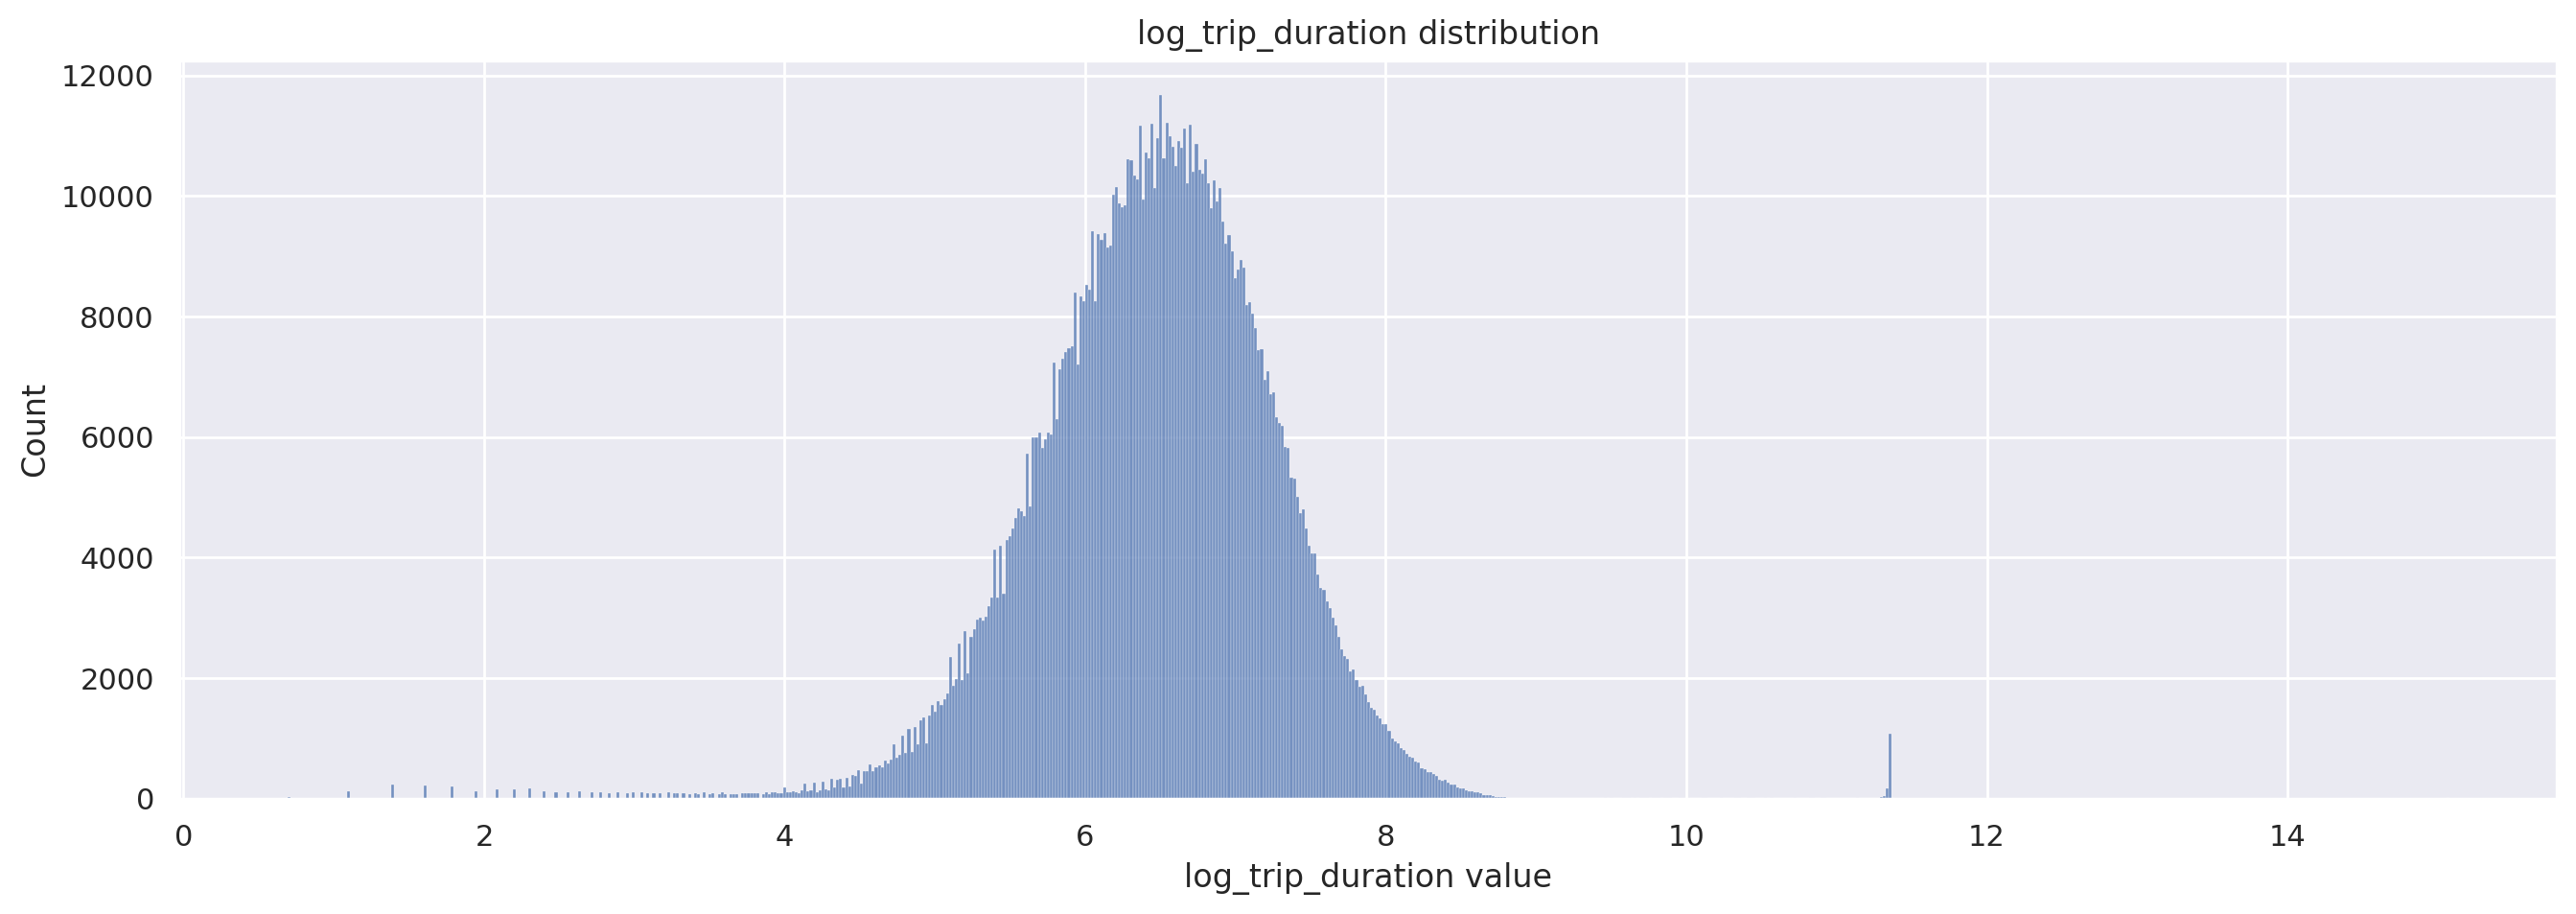

In [ ]:
sns.histplot(train['log_trip_duration']).set(title='log_trip_duration distribution')
plt.xlabel('log_trip_duration value')

Уберем строки с log_trip_duration меньшим чем 4 и log_trip_duration > 10

In [ ]:
train = train.loc[(train['log_trip_duration'] > 4) & (train['log_trip_duration'] < 10), :]
train

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1397246  id1594548 2016-06-13 22:15:23        -73.984726        40.737175   
1308206  id0707935 2016-06-02 02:12:10        -73.998650        40.717270   
535789   id1025614 2016-02-17 14:21:19        -73.982048        40.740261   
798332   id0047761 2016-02-29 21:08:06        -73.994102        40.759190   
1313015  id3060811 2016-06-16 06:53:50        -74.012299        40.701466   
...            ...                 ...               ...              ...   
1428135  id3297563 2016-01-20 18:39:20        -73.961716        40.755581   
480729   id3313539 2016-06-17 00:20:12        -73.981918        40.674381   
1264807  id1960681 2016-06-08 17:54:51        -73.999039        40.749760   
795880   id0343528 2016-03-11 08:33:59        -73.883217        40.747829   
1313943  id3327994 2016-05-12 10:28:37        -73.968414        40.791733   

         dropoff_longitude  dropoff_latitude  log_trip_duration  day_of_week  \
1397246         -74.000862         40.741886           5.993961            0   
1308206         -73.868622         40.747570           7.932003            3   
535789          -73.980057         40.751900           6.489205            2   
798332          -73.977432         40.782902           6.298949            0   
1313015         -73.990669         40.693214           6.006353            3   
...                    ...               ...                ...          ...   
1428135         -73.970177         40.750679           5.828946            2   
480729          -73.951378         40.712196           6.641182            4   
1264807         -74.006706         40.740639           5.575949            2   
795880          -73.884804         40.757679           5.771441            4   
1313943         -73.979012         40.763950           7.383368            3   

         month  hour  ...  haversine  log_haversine  start_when_traffic_jam  \
1397246      6    22  ...   1.456923       0.898910                       0   
1308206      6     2  ...  11.462460       2.522721                       0   
535789       2    14  ...   1.304986       0.835075                       0   
798332       2    21  ...   2.987097       1.383063                       0   
1313015      6     6  ...   2.041258       1.112271                       0   
...        ...   ...  ...        ...            ...                     ...   
1428135      1    18  ...   0.897239       0.640400                       0   
480729       6     0  ...   4.930579       1.780122                       0   
1264807      6    17  ...   1.202435       0.789563                       0   
795880       3     8  ...   1.103349       0.743531                       0   
1313943      5    10  ...   3.215558       1.438782                       1   

         start_when_no_traffic end_when_traffic_jam end_when_no_traffic  \
1397246                      0                    0                   0   
1308206                      0                    0                   0   
535789                       0                    0                   0   
798332                       0                    0                   0   
1313015                      0                    0                   0   
...                        ...                  ...                 ...   
1428135                      0                    0                   0   
480729                       0                    0                   0   
1264807                      0                    0                   0   
795880                       0                    0                   0   
1313943                      0                    1                   0   

        start_region end_region  str_vendor_id  str_passenger_count  
1397246          214        196              1                    1  
1308206          260         -1              2                    6  
535789           199        167              2                    1  


Text(0.5, 0, 'log_haversine value')

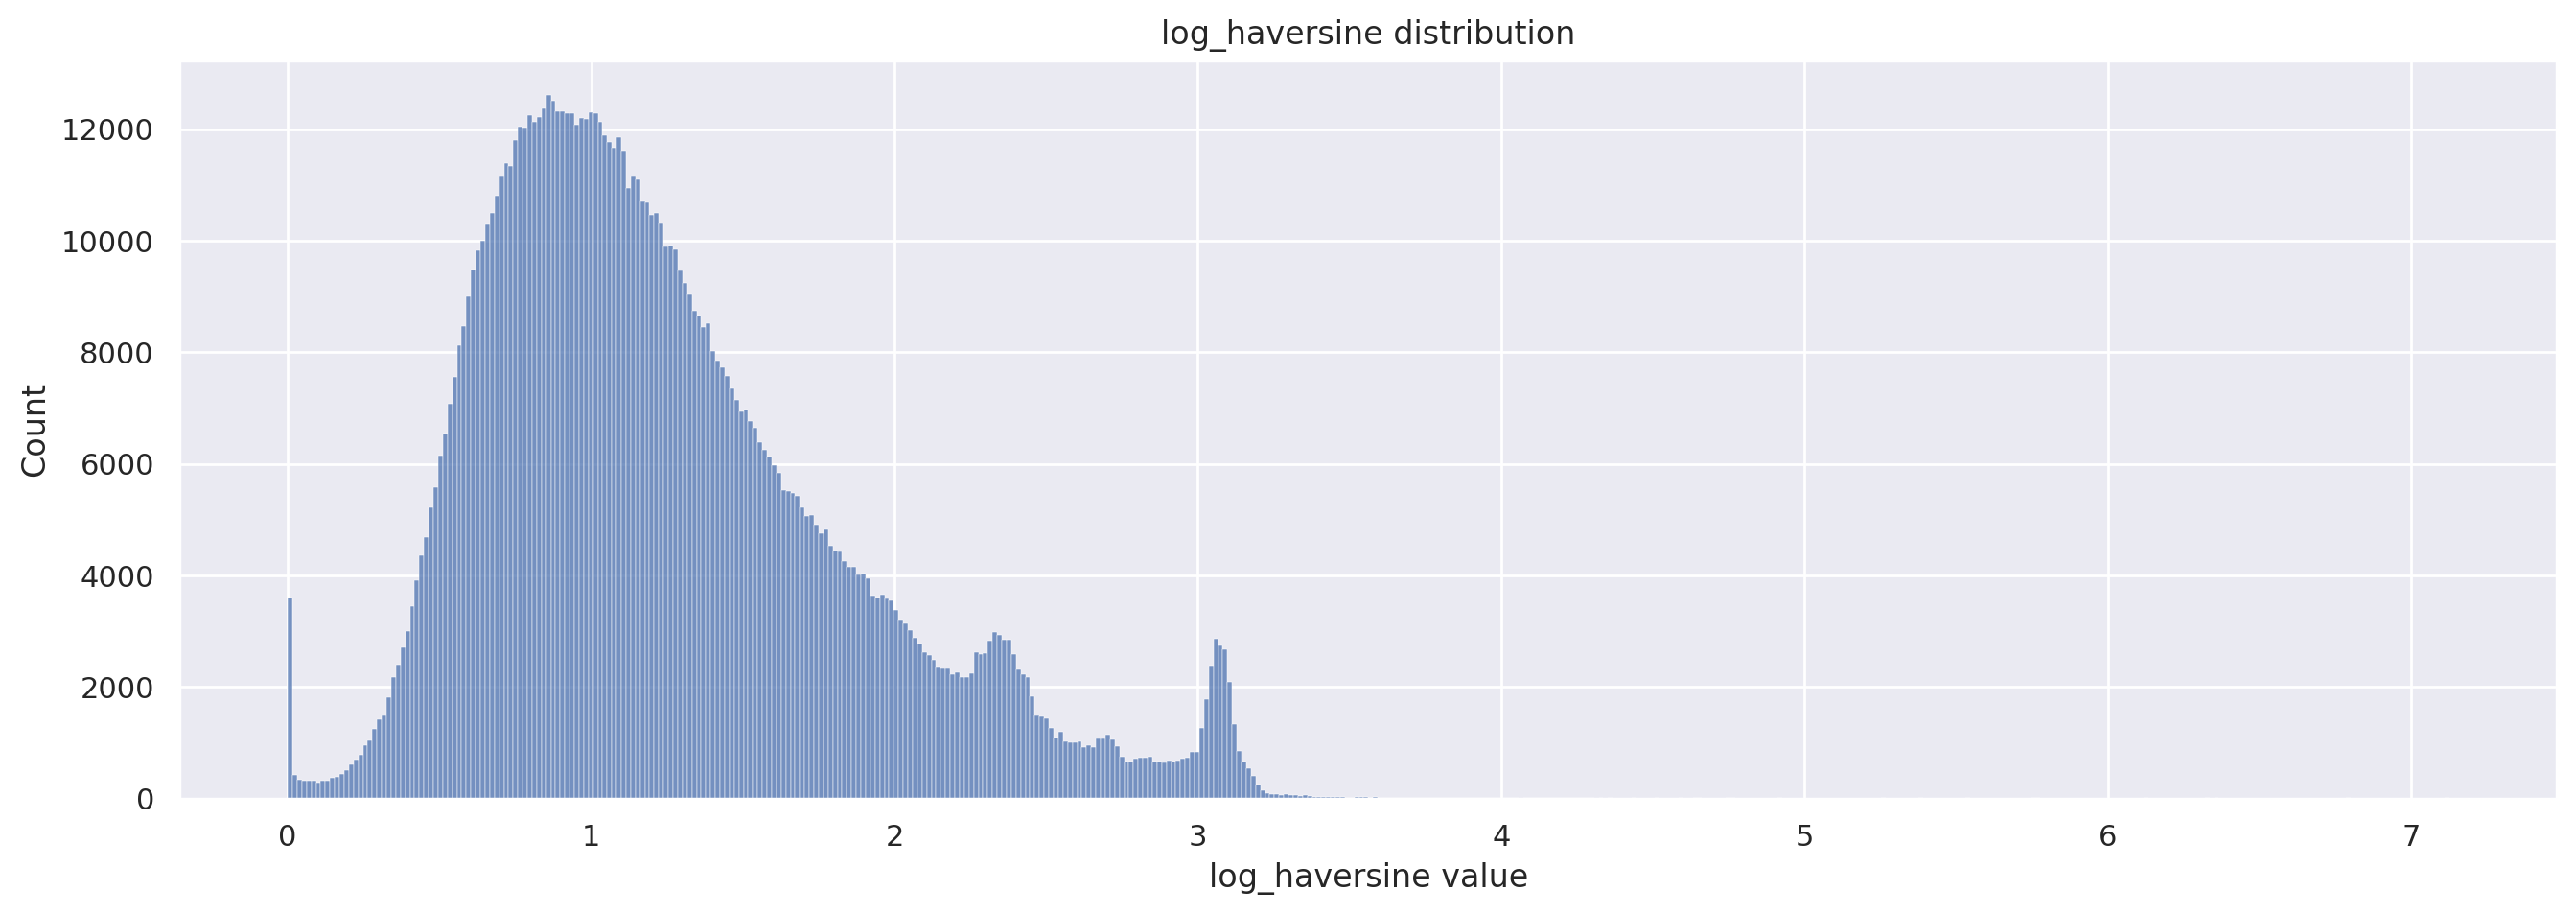

In [ ]:
sns.histplot(train['log_haversine']).set(title='log_haversine distribution')
plt.xlabel('log_haversine value')

Вырежем все объекты с log_haversine > 3 или log_haversine == 0

In [ ]:
train = train.loc[(train['log_haversine'] < 3) & (train['log_haversine'] > 0), :]
train

id     pickup_datetime  pickup_longitude  pickup_latitude  \
1397246  id1594548 2016-06-13 22:15:23        -73.984726        40.737175   
1308206  id0707935 2016-06-02 02:12:10        -73.998650        40.717270   
535789   id1025614 2016-02-17 14:21:19        -73.982048        40.740261   
798332   id0047761 2016-02-29 21:08:06        -73.994102        40.759190   
1313015  id3060811 2016-06-16 06:53:50        -74.012299        40.701466   
...            ...                 ...               ...              ...   
1428135  id3297563 2016-01-20 18:39:20        -73.961716        40.755581   
480729   id3313539 2016-06-17 00:20:12        -73.981918        40.674381   
1264807  id1960681 2016-06-08 17:54:51        -73.999039        40.749760   
795880   id0343528 2016-03-11 08:33:59        -73.883217        40.747829   
1313943  id3327994 2016-05-12 10:28:37        -73.968414        40.791733   

         dropoff_longitude  dropoff_latitude  log_trip_duration  day_of_week  \
1397246         -74.000862         40.741886           5.993961            0   
1308206         -73.868622         40.747570           7.932003            3   
535789          -73.980057         40.751900           6.489205            2   
798332          -73.977432         40.782902           6.298949            0   
1313015         -73.990669         40.693214           6.006353            3   
...                    ...               ...                ...          ...   
1428135         -73.970177         40.750679           5.828946            2   
480729          -73.951378         40.712196           6.641182            4   
1264807         -74.006706         40.740639           5.575949            2   
795880          -73.884804         40.757679           5.771441            4   
1313943         -73.979012         40.763950           7.383368            3   

         month  hour  ...  haversine  log_haversine  start_when_traffic_jam  \
1397246      6    22  ...   1.456923       0.898910                       0   
1308206      6     2  ...  11.462460       2.522721                       0   
535789       2    14  ...   1.304986       0.835075                       0   
798332       2    21  ...   2.987097       1.383063                       0   
1313015      6     6  ...   2.041258       1.112271                       0   
...        ...   ...  ...        ...            ...                     ...   
1428135      1    18  ...   0.897239       0.640400                       0   
480729       6     0  ...   4.930579       1.780122                       0   
1264807      6    17  ...   1.202435       0.789563                       0   
795880       3     8  ...   1.103349       0.743531                       0   
1313943      5    10  ...   3.215558       1.438782                       1   

         start_when_no_traffic end_when_traffic_jam end_when_no_traffic  \
1397246                      0                    0                   0   
1308206                      0                    0                   0   
535789                       0                    0                   0   
798332                       0                    0                   0   
1313015                      0                    0                   0   
...                        ...                  ...                 ...   
1428135                      0                    0                   0   
480729                       0                    0                   0   
1264807                      0                    0                   0   
795880                       0                    0                   0   
1313943                      0                    1                   0   

        start_region end_region  str_vendor_id  str_passenger_count  
1397246          214        196              1                    1  
1308206          260         -1              2                    6  
535789           199        167              2                    1  


снова обучаем линрег

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train.drop(['log_trip_duration'], axis=1)
y_train = train.loc[:, 'log_trip_duration']
X_test = test.drop(['log_trip_duration'], axis=1)
y_test = test.loc[:, 'log_trip_duration']

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'anomal',
               'start_when_traffic_jam', 'start_when_no_traffic', 'end_when_traffic_jam', 'end_when_no_traffic', 'start_region', 'end_region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7285928456565588
constant rmsle:  0.7957592365411509


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Из всех категориальных только start_region и end_region содержит редкие категории:

In [ ]:
train['start_region'].value_counts().tail(20)

186    3
171    3
238    2
217    2
94     2
239    2
55     2
113    2
233    2
202    1
209    1
97     1
98     1
99     1
255    1
177    1
131    1
126    1
240    1
59     1
Name: start_region, dtype: int64

In [ ]:
train['end_region'].value_counts().tail(25)

59     3
98     3
126    3
296    3
67     3
114    2
81     2
272    2
202    2
82     2
217    2
145    2
52     2
21     2
51     2
24     1
37     1
218    1
66     1
33     1
186    1
84     1
161    1
20     1
65     1
Name: end_region, dtype: int64

In [ ]:
start_region_rare = train[['start_region']].value_counts().tail(20).reset_index()['start_region']
end_region_rare = train[['end_region']].value_counts().tail(25).reset_index()['end_region']

In [ ]:
train.loc[train['start_region'].isin(start_region_rare), 'start_region'] = -2

In [ ]:
train.loc[train['end_region'].isin(end_region_rare), 'end_region'] = -2

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train.drop(['log_trip_duration'], axis=1)
y_train = train.loc[:, 'log_trip_duration']
X_test = test.drop(['log_trip_duration'], axis=1)
y_test = test.loc[:, 'log_trip_duration']

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'anomal',
               'start_when_traffic_jam', 'start_when_no_traffic', 'end_when_traffic_jam', 'end_when_no_traffic', 'start_region', 'end_region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

ridge = Ridge()
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', ridge)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7286030000505492
constant rmsle:  0.7957592365411509


Обучите модель на очищенных данных и посчитайте качество на тестовой выборке. (обучил выше)

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
print('Кол-во категориальных признаков до кодирования: ', len(categorical))
print('Кол-во категориальных признаков до кодирования: ', len(ridge.coef_))

Кол-во категориальных признаков до кодирования:  11
Кол-во категориальных признаков до кодирования:  686


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

**Ответ**: Ridge оказался лучше

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train = train.drop(['log_trip_duration'], axis=1)
y_train = train.loc[:, 'log_trip_duration']
X_test = test.drop(['log_trip_duration'], axis=1)
y_test = test.loc[:, 'log_trip_duration']

numeric_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
categorical = ['day_of_week', 'month', 'hour', 'day_of_year', 'anomal',
               'start_when_traffic_jam', 'start_when_no_traffic', 'end_when_traffic_jam', 'end_when_no_traffic', 'start_region', 'end_region']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso = Lasso()
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', lasso)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('rmsle: ', rmsle(y_pred, y_test))
print('constant rmsle: ', rmsle_best_const)

rmsle:  0.7977784412966525
constant rmsle:  0.7957592365411509


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.